# Part I - Prosper Loan Exploration 
## by Ovy Evbodi

## Introduction
 This is a loan dataset from ProsperLoans that contains various variables related to their borrowers and the company's loan services. The dataset was provied by [Udacity](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv) and this helpful [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) sheds some light on the various variables. 

  

## Preliminary Wrangling


#### Importing packages
I'll kick-off by importing all. the packages needed for my analysis. I will be working with numpy, pandas, matplotib and seaborn throughout this data visualization project.

In [43]:
#importing packages needed, and configuring matplotlib to render plots inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#setting up matplotlib to render plots larger and inline, and seaborn's grid style
%matplotlib inline
sb.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12,8)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
sb.set(rc={"figure.dpi":100, 'savefig.dpi':300})

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#### Loading the dataset
Now that I've imported all the packages needed for this analysis, I'll be loading and exploring the ProsperLoan dataset in the next couple of cells.

In [2]:
#loading the prosper loan dataset into a pandas DataFrame
loan_df = pd.read_csv('prosperLoanData.csv')

####  A quick overview of the dataset
Here, I'll be checking the structure and size of the DataFrame, as well as the type of the various variables, to have a quick oveerview of the dataset. I'll also get some summary statistics on any statistical variables contained in the DataFrame. 

In [3]:
#a quick overview of what the dataset looks like
loan_df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [4]:
#getting some info on the DataFrame(especially the columns)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#getting some summary statistics on the statistical variables
print(loan_df.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [6]:
#finding out the shape of the DataFrame
loan_df.shape

(113937, 81)

### What is the structure of your dataset?

The DataFrame comprises of 113,937 records, with 81 columns including the borrower's occupation, credit grade, loan status and many more. Please take out some time to read through the readme file to have a better understanding of all the columns in this DataFrame.

### What is/are the main feature(s) of interest in your dataset?

I would love to find out what factors influence the loan status of a loan, hence, my main feature of interest is the loan status. During the course of my analysis, I hope to discover meaningful insights that might aid in the prediction of what factors influence the loan status outcome of a loan.<br>
I'm also interested in finding out what kind of loan has the least number of defaulters.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I imagine that borrowers with a low debt to income ratio would be able to payoff their loans, and that study loans would typically be paid off with a lower percentage of defaulters due to the fact that most study loan borrowers get employed after school. 

## Univariate Exploration

 In this section, I'll be exploring single variables in the DataFrame to have an understanding of their distribution and frequency.

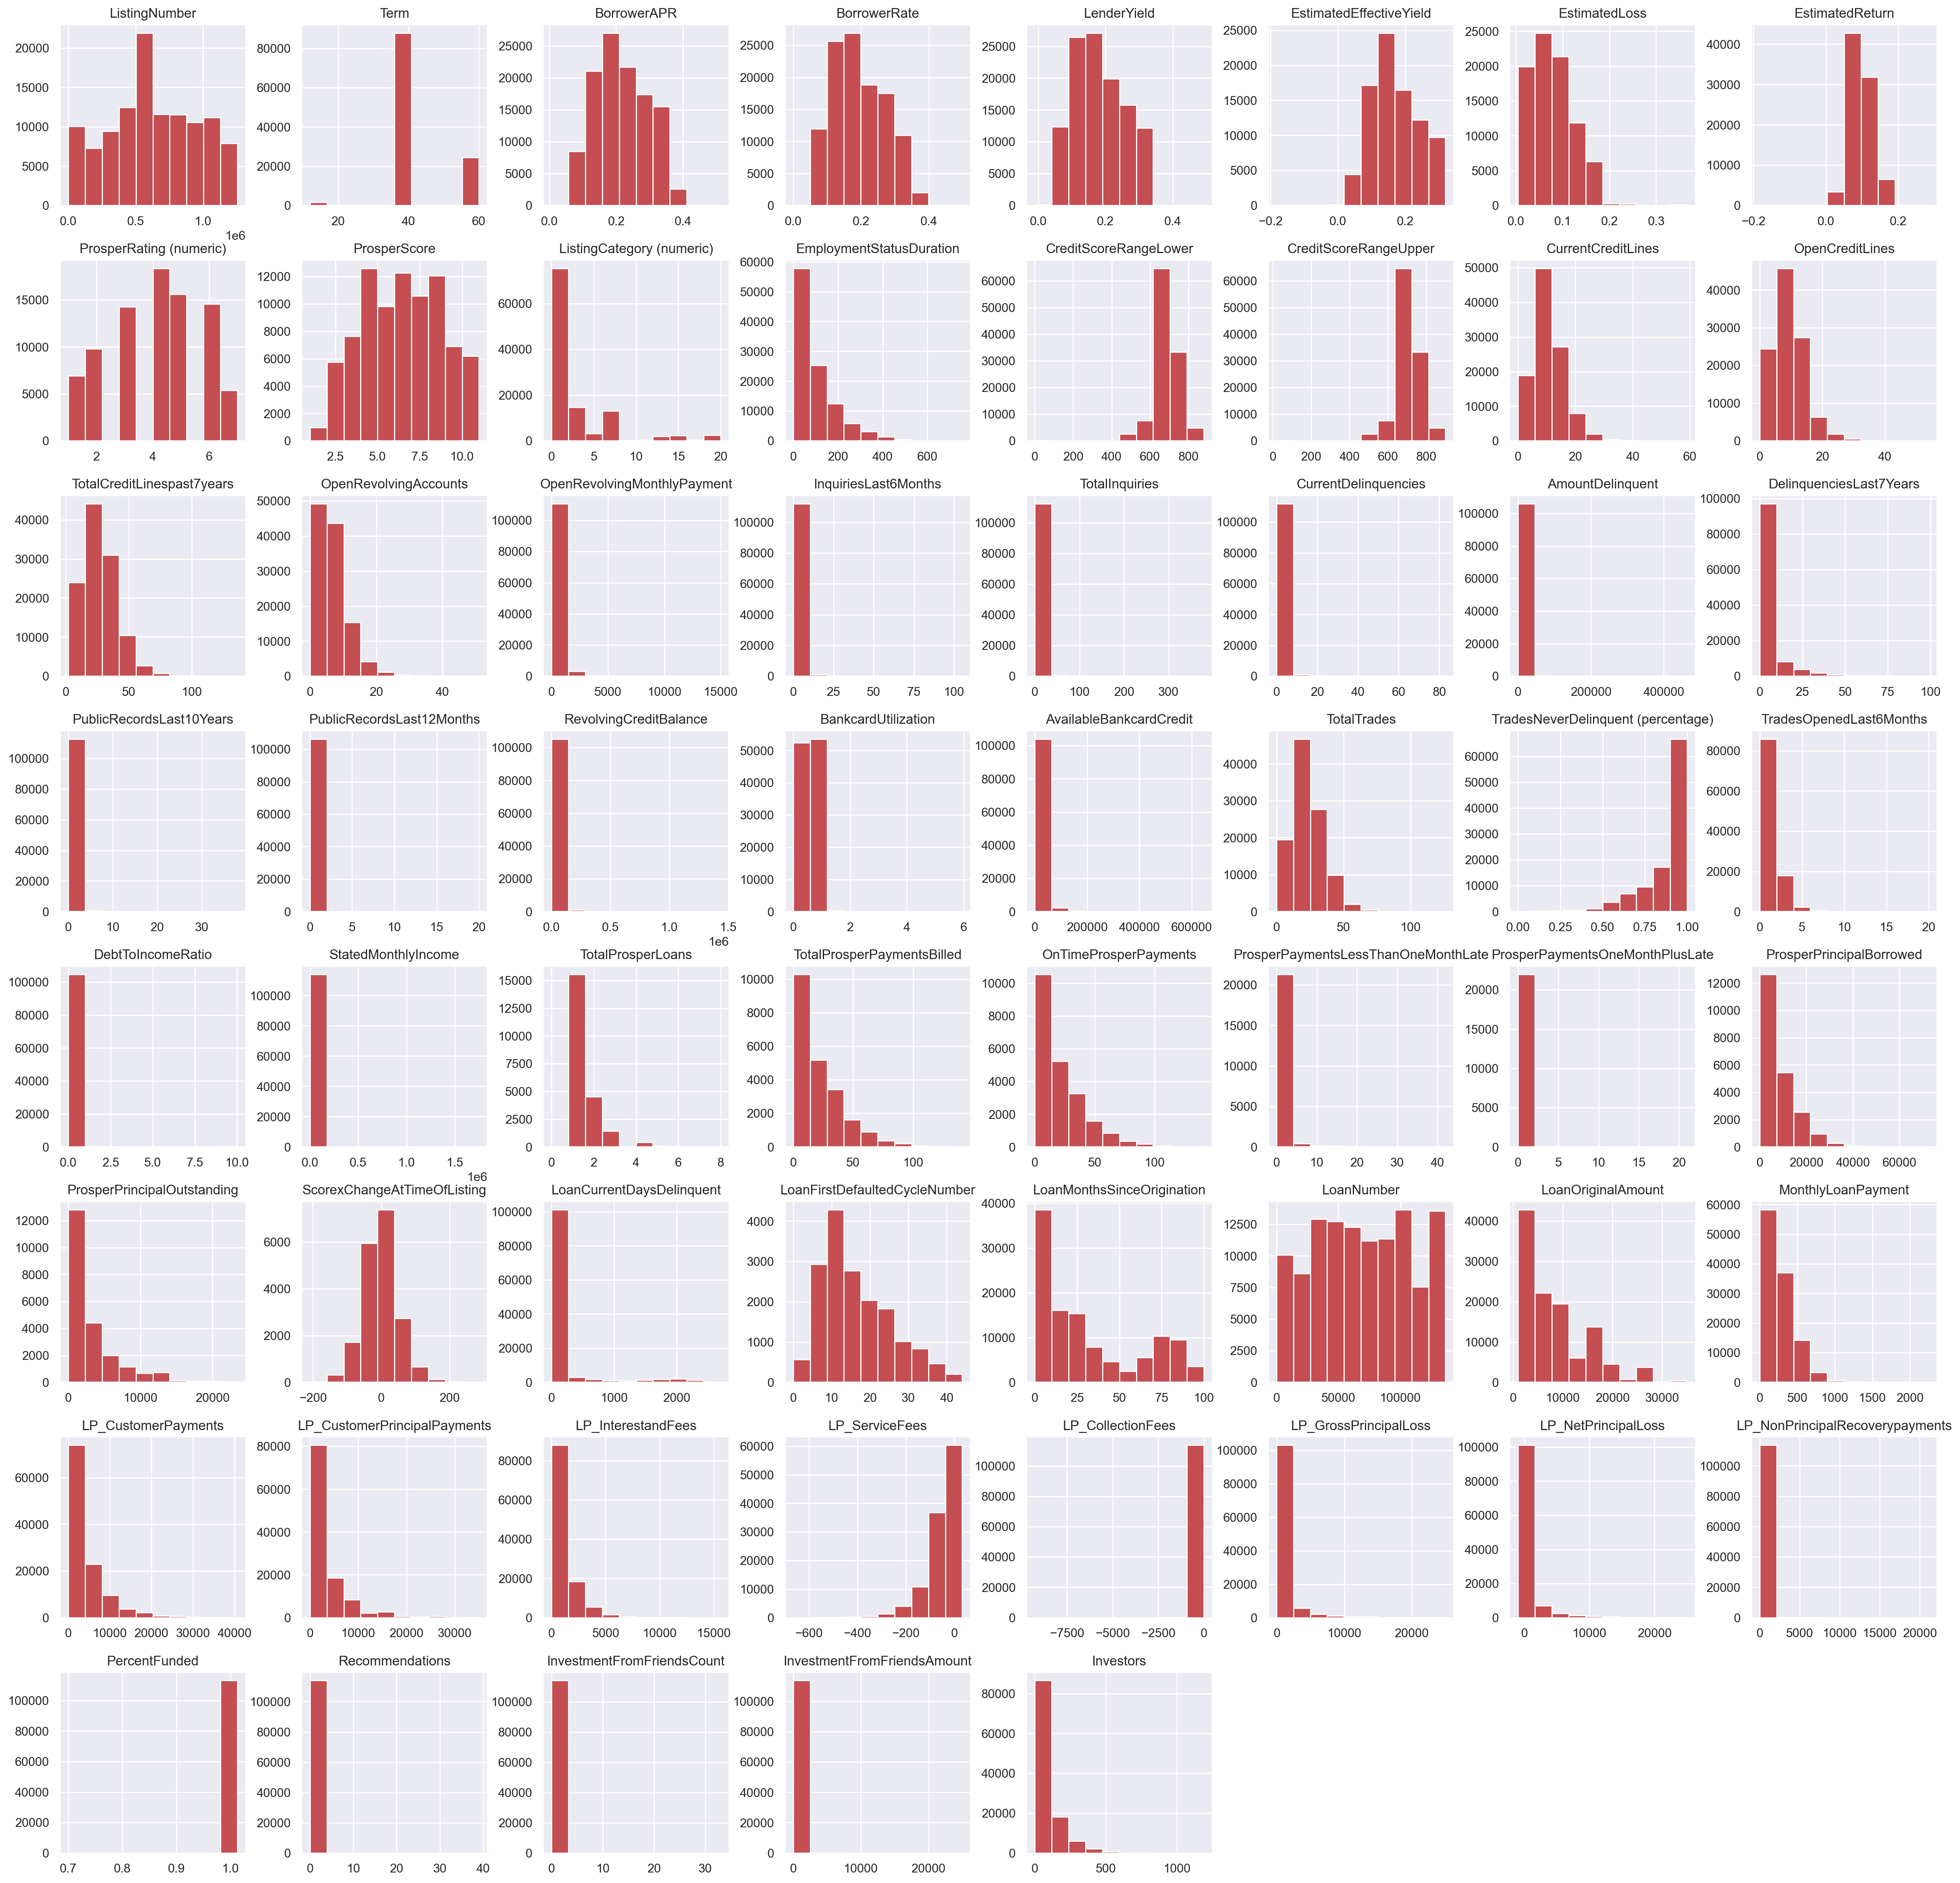

In [7]:
#plotting a histograms to get a high level understanding of the distribution of the variables in the DataFrame
loan_df.hist(figsize=(30, 30), color="r");

The histograms above look clustered, so I'll focus on some variables of interest, and plot them individually, to produce cleaner and clearer histograms.

In [8]:
#summary statistics of the 'BorrowerRate' column
loan_df['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

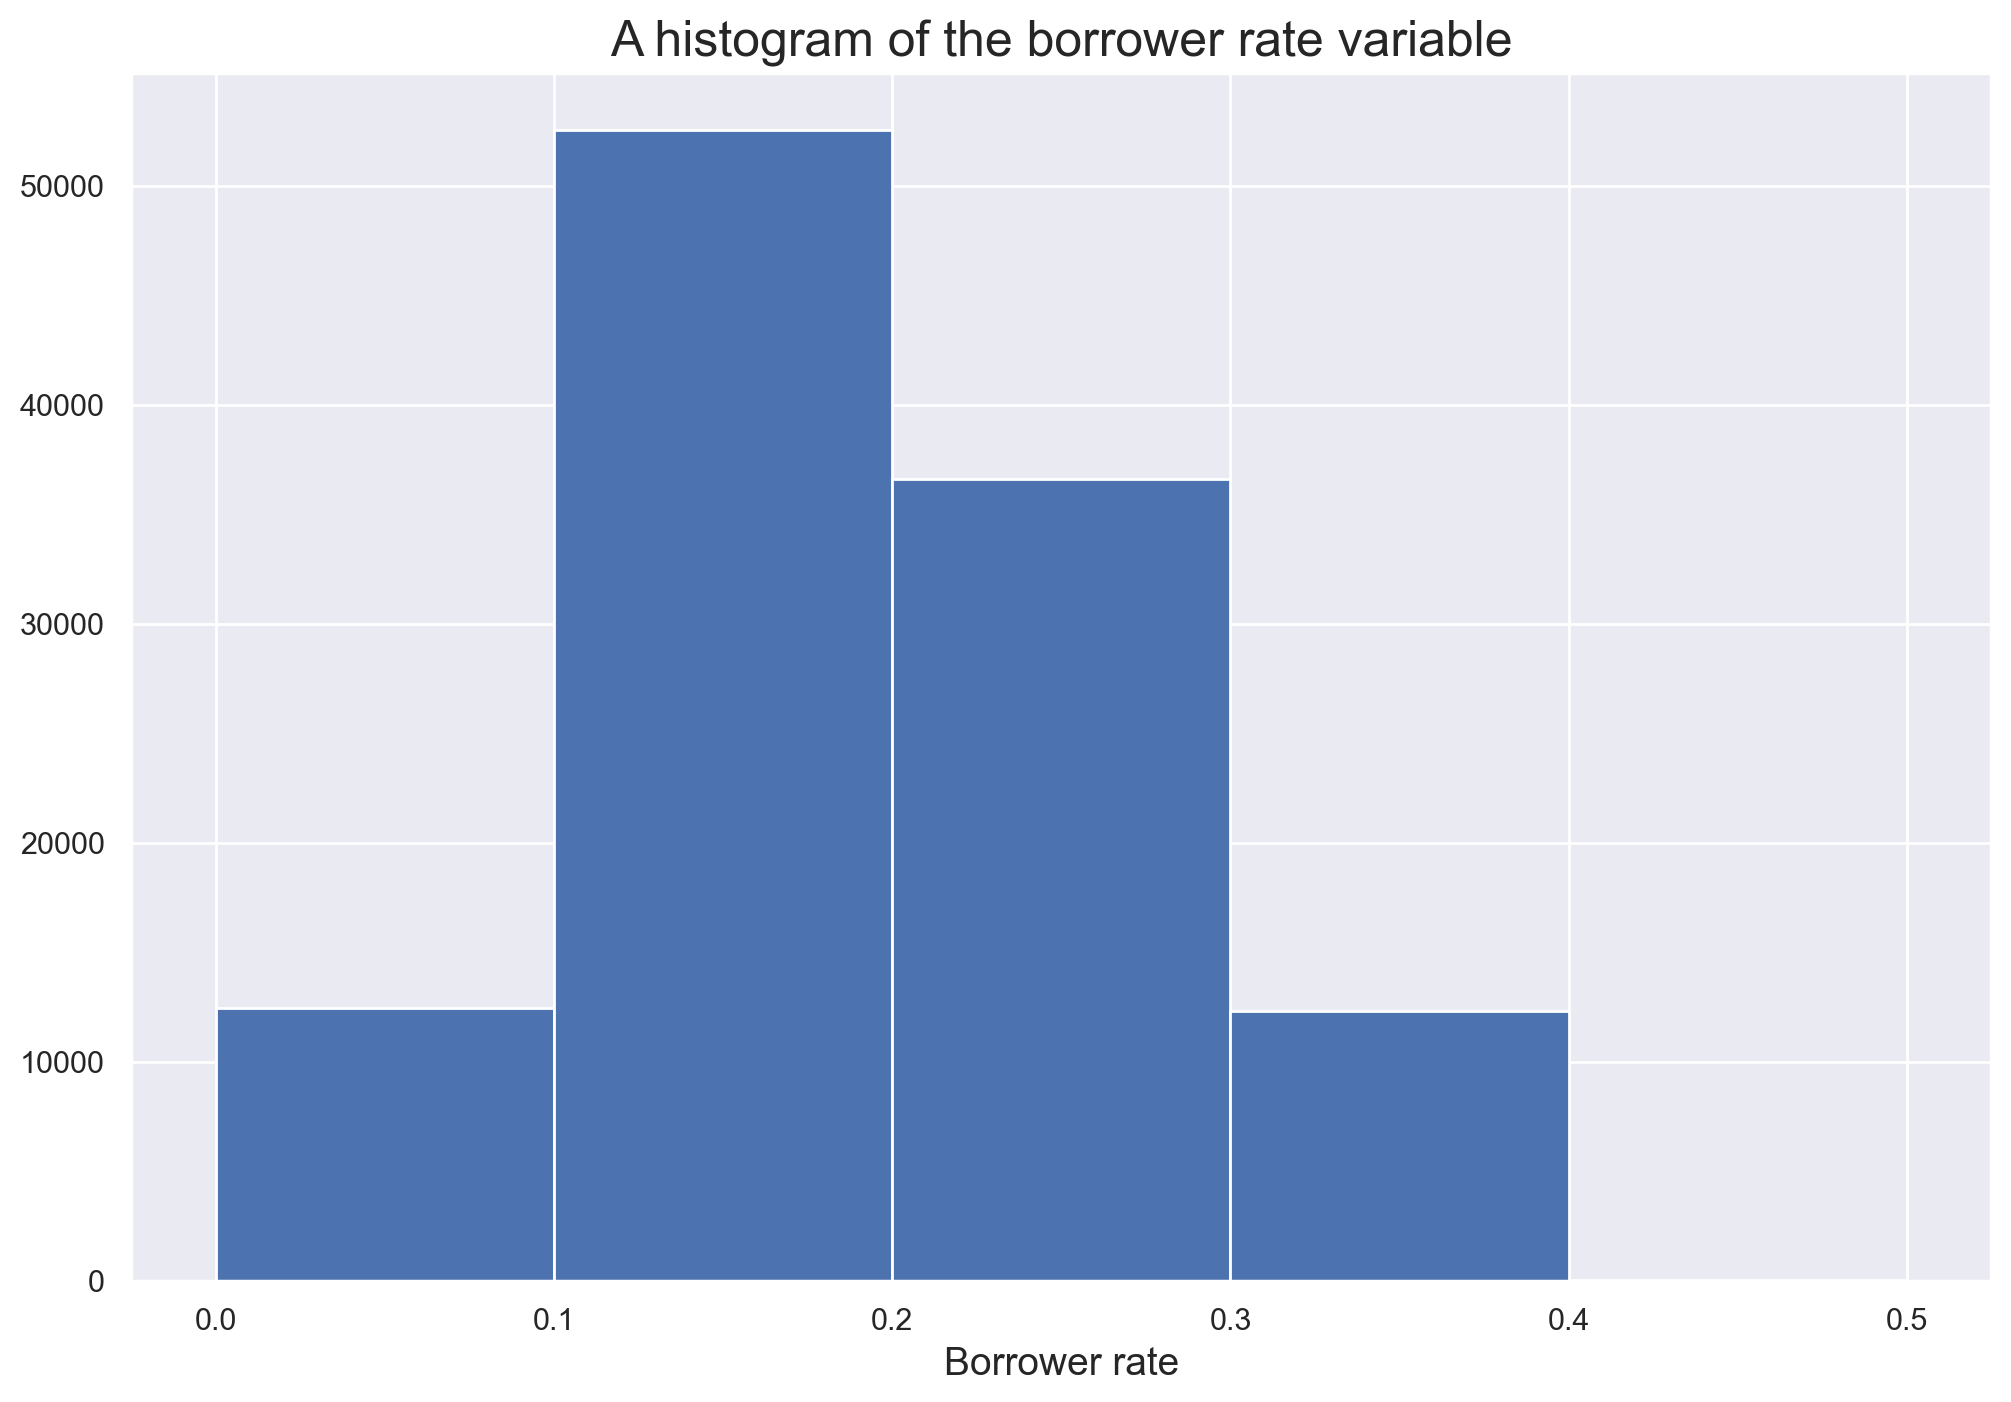

In [9]:
#plotting a histogram of BorrowerRate
binsize = np.arange(0,loan_df['BorrowerRate'].max()+0.1, 0.1)
plt.hist(data = loan_df, x = 'BorrowerRate', bins = binsize)
plt.title('A histogram of the borrower rate variable', fontsize = 18)
plt.xlabel('Borrower rate', fontsize = 14)
plt.show()

The data looks unimodal, with the peak between 0.1 and 0.2 for about half of the loans given out by ProsperLoans. The highest borrower rate is around 0.4, but only very few loans had such a high borrower rate.

In [10]:
#creating a function for plotting histograms
def histogram_plot(dataset, column, bins, ticks, limits):
    binsize = bins
    bins = np.arange(0, dataset[column].max()+binsize, binsize)
    plt.figure(figsize = [8, 5])
    plt.hist(data = dataset, x = column, bins = bins, color = 'g')
    plt.xlim(limits)
    plt.xlabel(column, fontsize = 14)
    plt.xticks(ticks)
    plt.ylabel('Count', fontsize = 14)
    plt.title(f'A histogram of the {column}', fontsize = 18)
    plt.show()

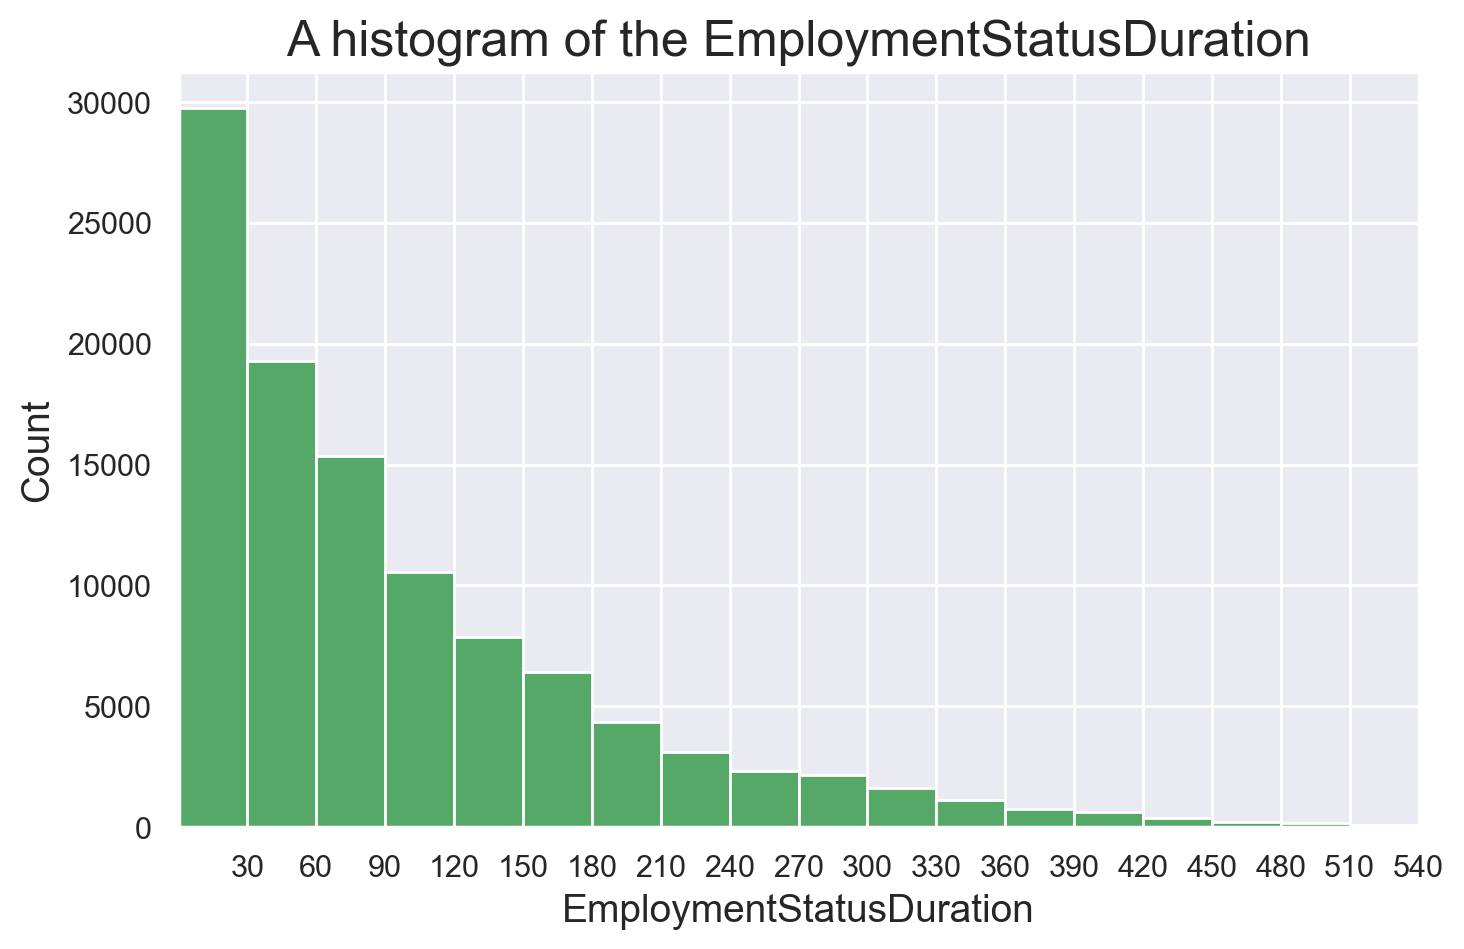

In [11]:
#plotting a histogram of the Employment duration of the borrowers
histogram_plot(loan_df, 'EmploymentStatusDuration', 30,
               [30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480,510,540], [0, 540])

From the figure above, it is apparent that the number of loans taken decreases with increased number of months of employment. More people took out loans during their first 2-3 years of employment. The decline is linear.

In [12]:
#renaming some columns of interest to follow the standard python convention
loan_df.rename(columns ={'ListingCategory (numeric)': 'ListingCategory',
                         'ProsperRating (numeric)':'ProsperRating',
                         'ProsperRating (Alpha)':'ProsperRating',
                         'TradesNeverDelinquent (percentage)':'TradesNeverDelinquent'}, inplace=True)

In [13]:
#getting the value counts in the 'ListCategory' column
loan_df['ListingCategory'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

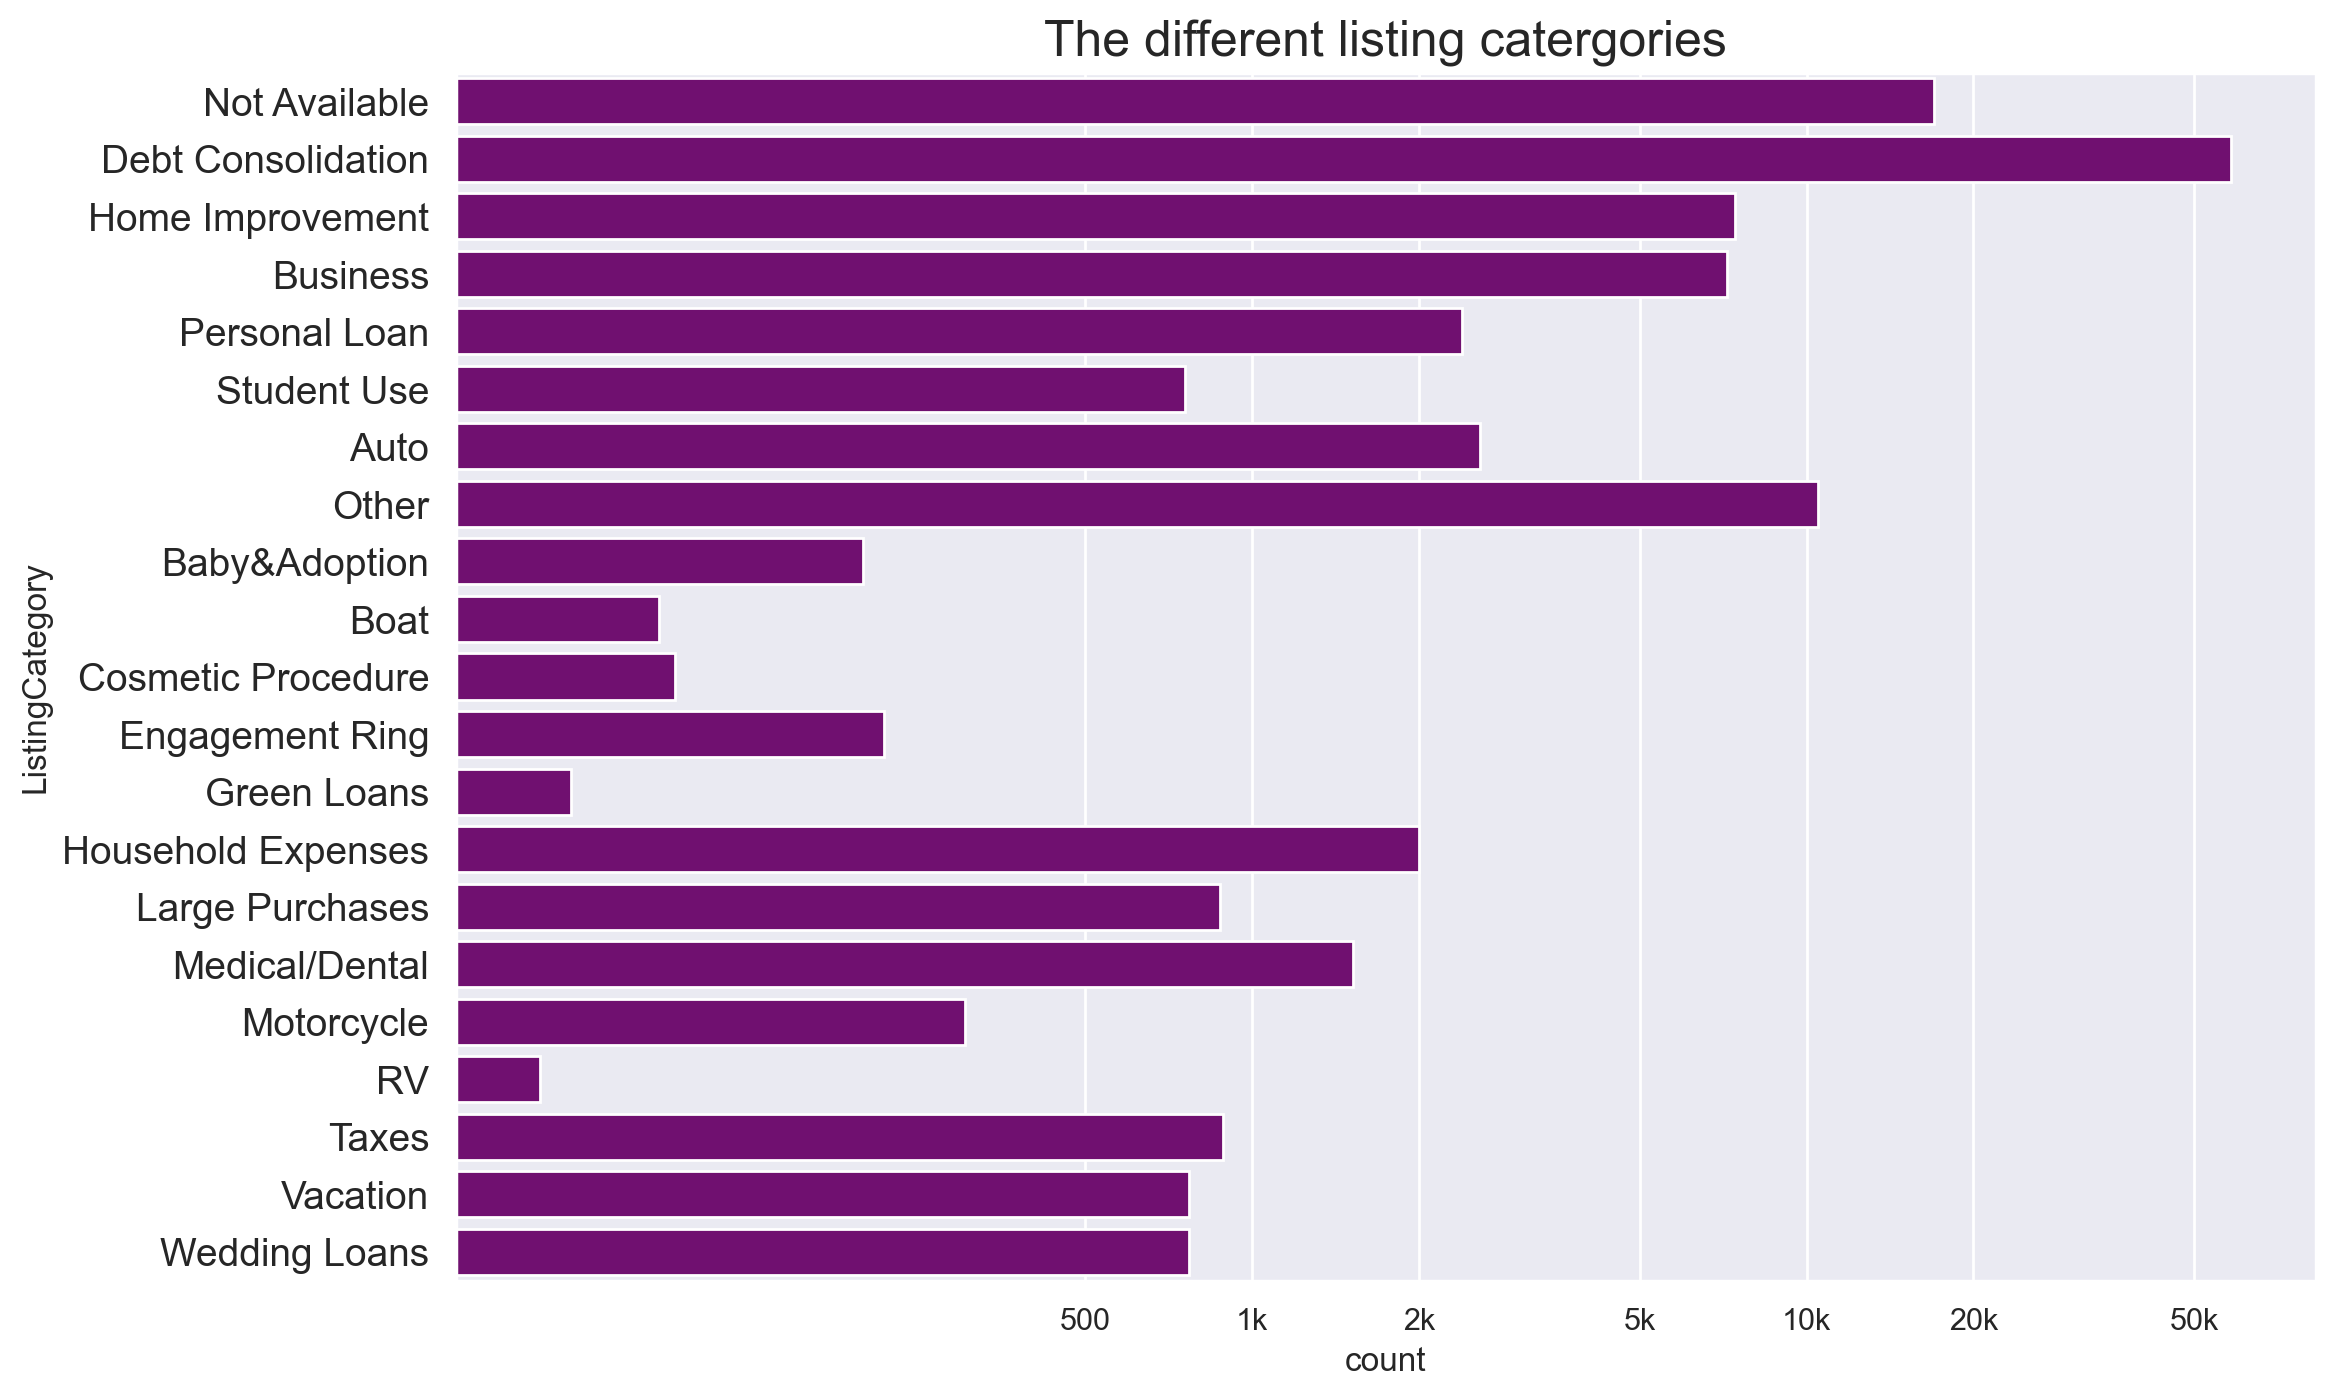

In [14]:
#plotting to see the distribution of the 'ListCategory' column
ylabels = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 
'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure',
'Engagement Ring', 'Green Loans','Household Expenses', 'Large Purchases', 'Medical/Dental',
'Motorcycle', 'RV', 'Taxes', 'Vacation','Wedding Loans']
ax = sb.countplot(data=loan_df, y='ListingCategory', color = 'purple')
ax.set_title('The different listing catergories', fontsize = 18)
ax.set_yticklabels(ylabels, fontsize = 14)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k'])
plt.show()

The encoding for the list categories was gotten from this dataset's data dictionary, and used to label the y axis. From the plot, more people took out loans for debt consolidation, home improvement and business, while fewer people took out loans for RV, boat e.t.c. 

In [15]:
#defining a function for plotting a simpler histogram
def mini_hist(dataset, column, title, x_label, y_label):
    #plt.figure(figsize = [8,5])
    plt.hist(data = dataset, x = column, color = 'y')
    plt.title(title, fontsize = 18)
    plt.xlabel(x_label, fontsize = 14)
    plt.ylabel(y_label, fontsize = 14)
    plt.xticks(rotation = 20)

In [16]:
#converting the datatype of the 'DateCreditPulled' column to datetime.
loan_df['DateCreditPulled'] = pd.to_datetime(loan_df['DateCreditPulled'])

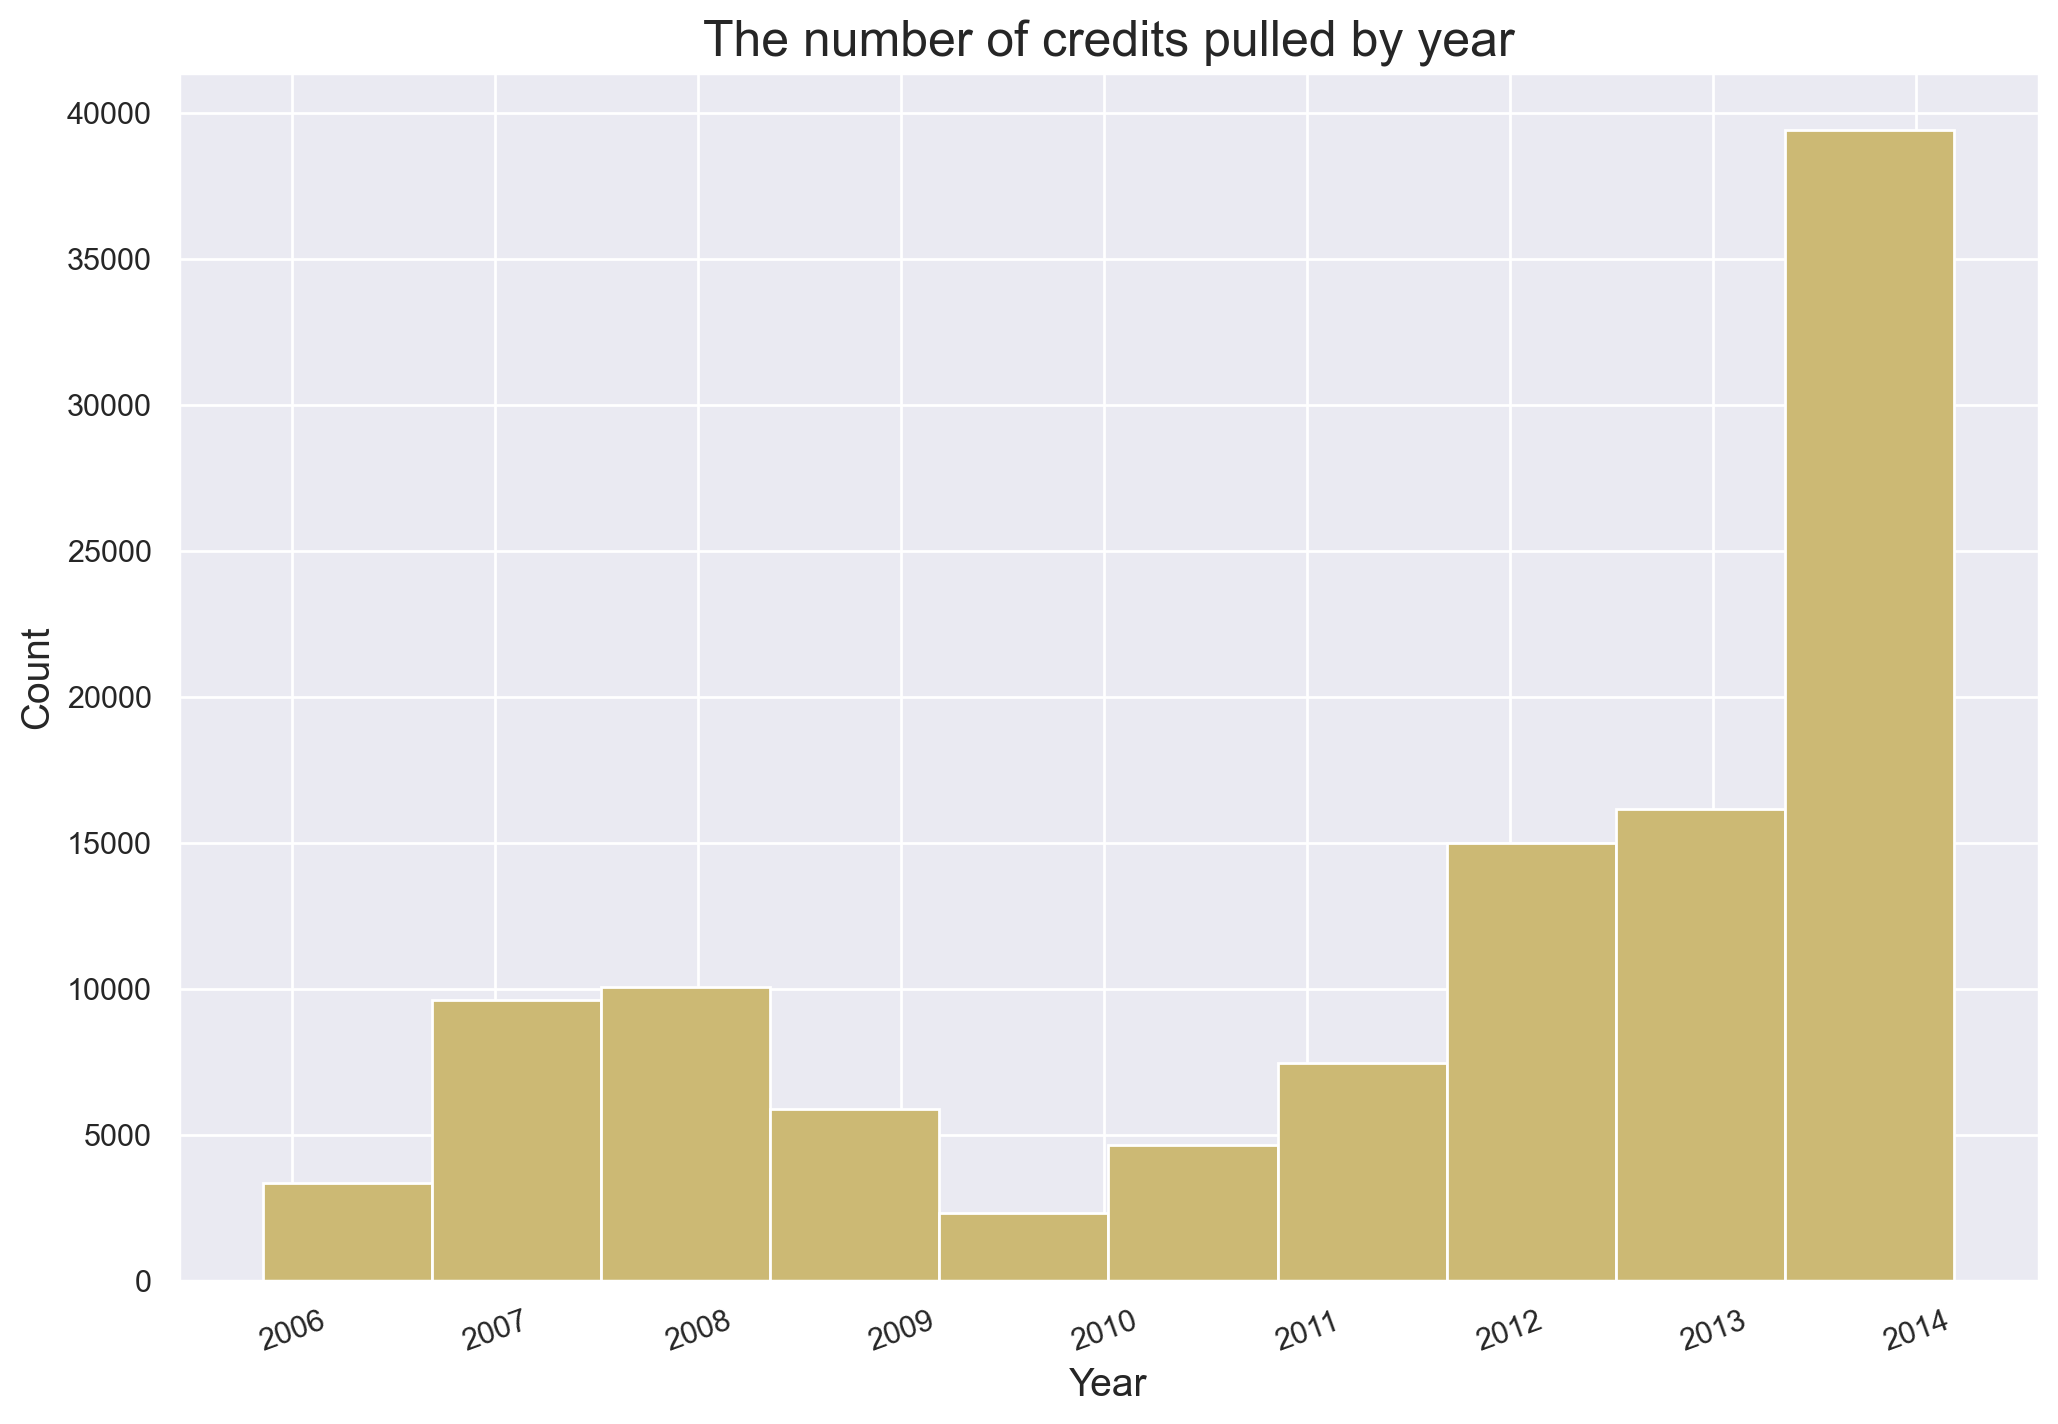

In [17]:
#plotting a histogram to show the distribution of credits pulled over the years
mini_hist(loan_df, 'DateCreditPulled', 'The number of credits pulled by year', 'Year', 'Count')


From the figure above, the number of Prosper loans progressively increased from 2010 through 2014, with a drastic shoot occuring around 2014.

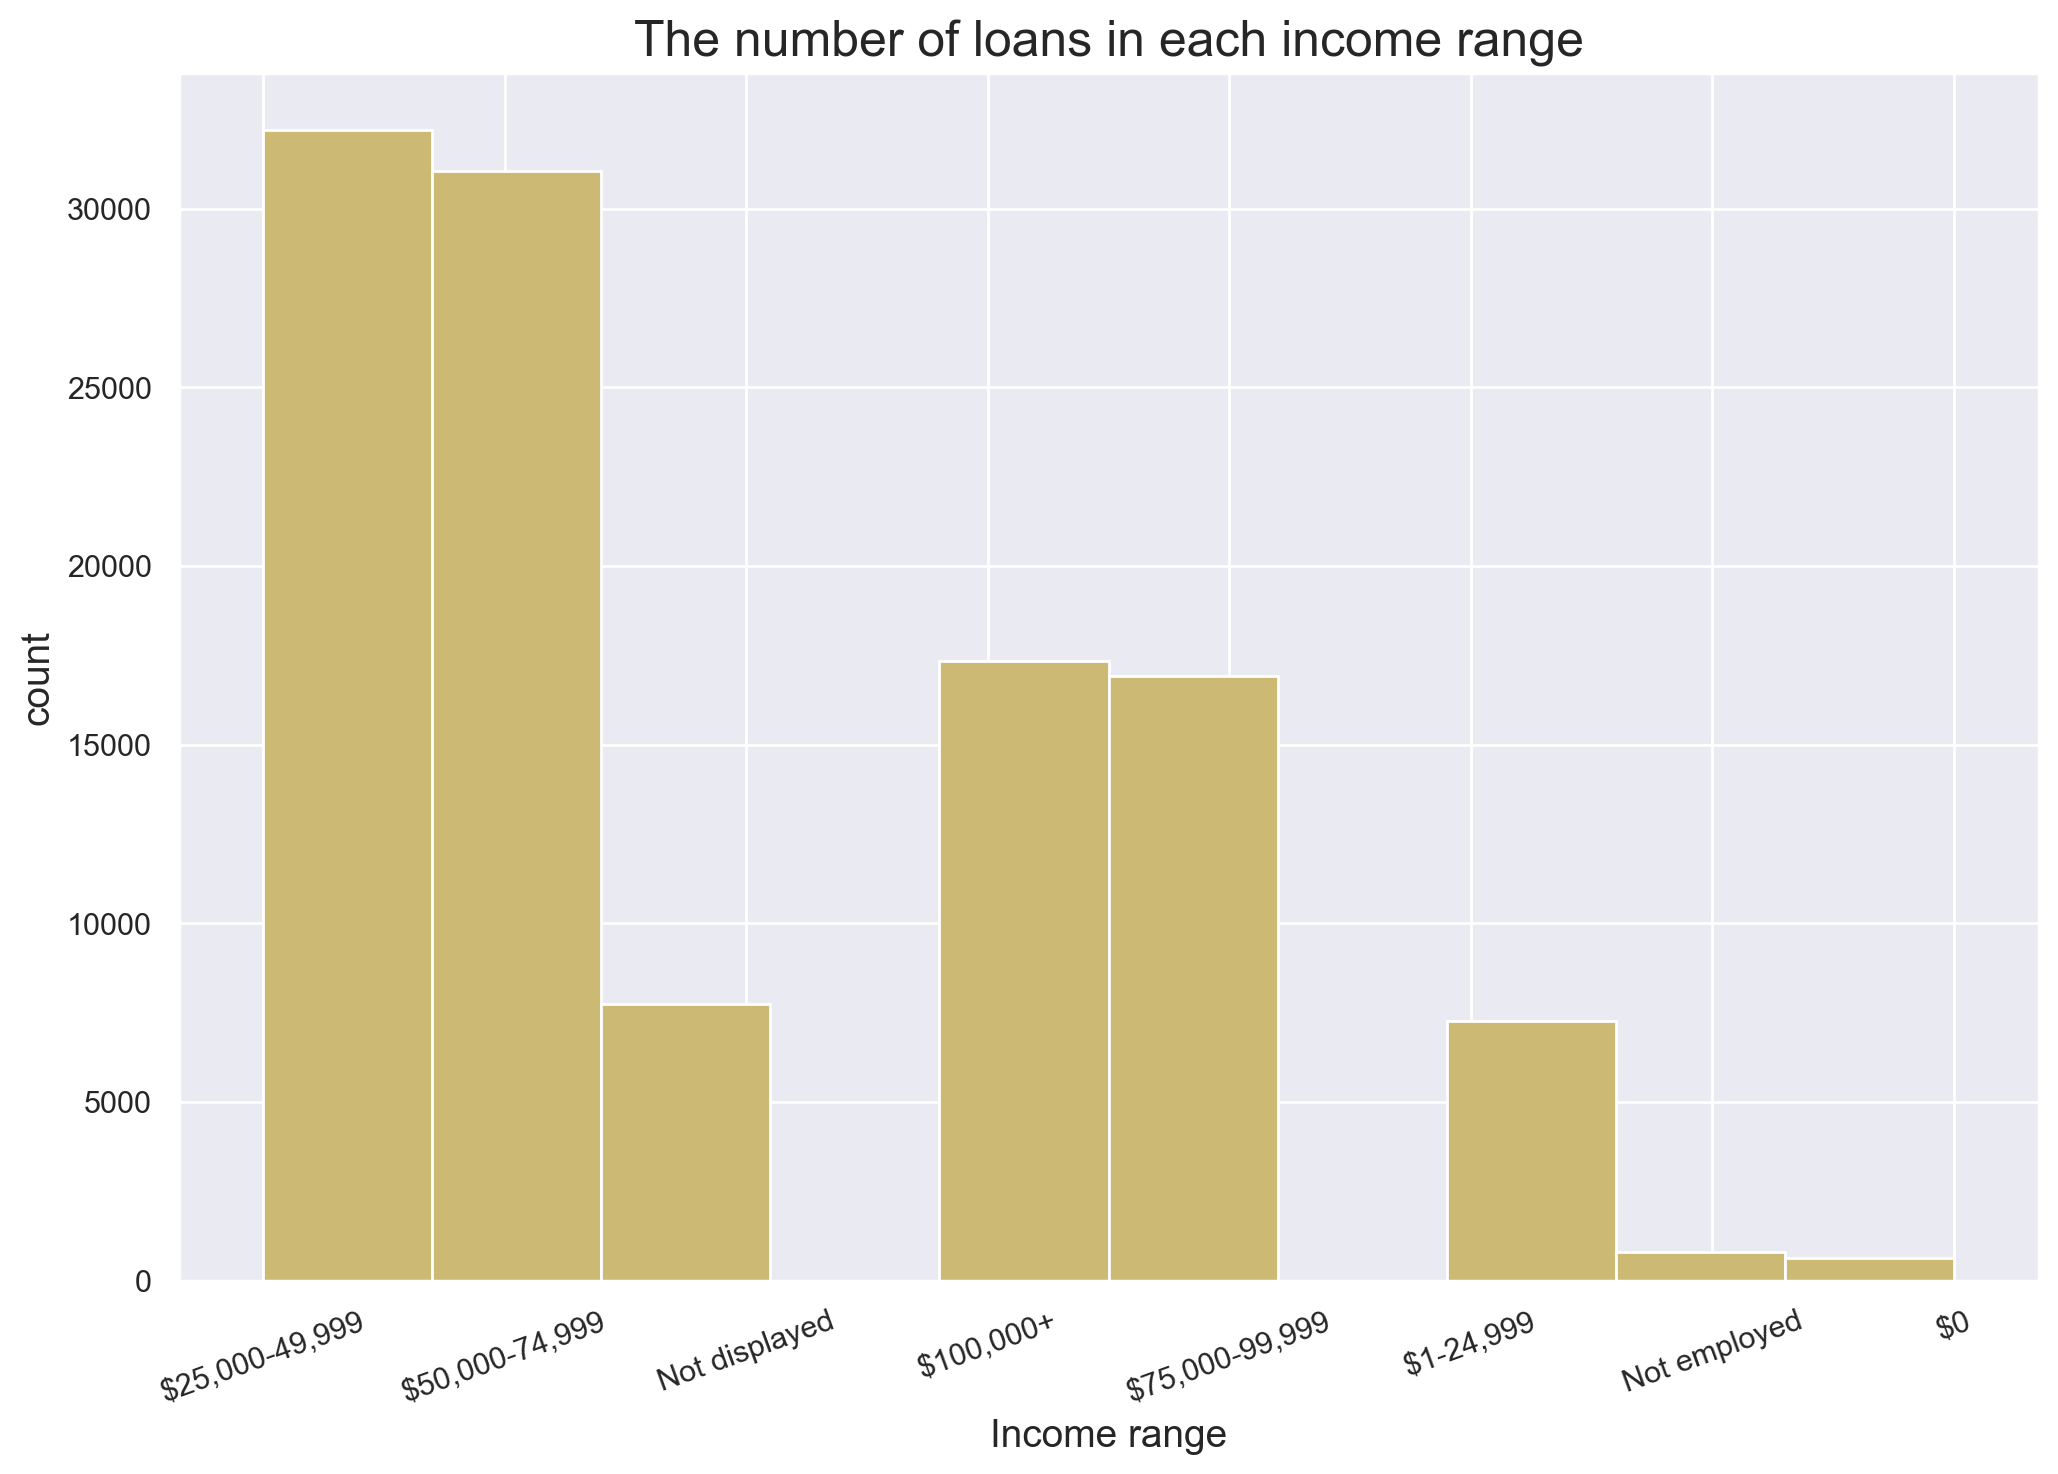

In [18]:
#plotting to show the number of borrowers by income range
mini_hist(loan_df, 'IncomeRange', 'The number of loans in each income range', 'Income range', 'count')

More loans were given to people within the USD 25,000-49,000  income bracket, and less loans were given to umemployed peole and those within the USD 1-24,999 income bracket.

In [19]:
#getting the value counts in the 'IsBorrowerHomeowner' column
loan_df['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

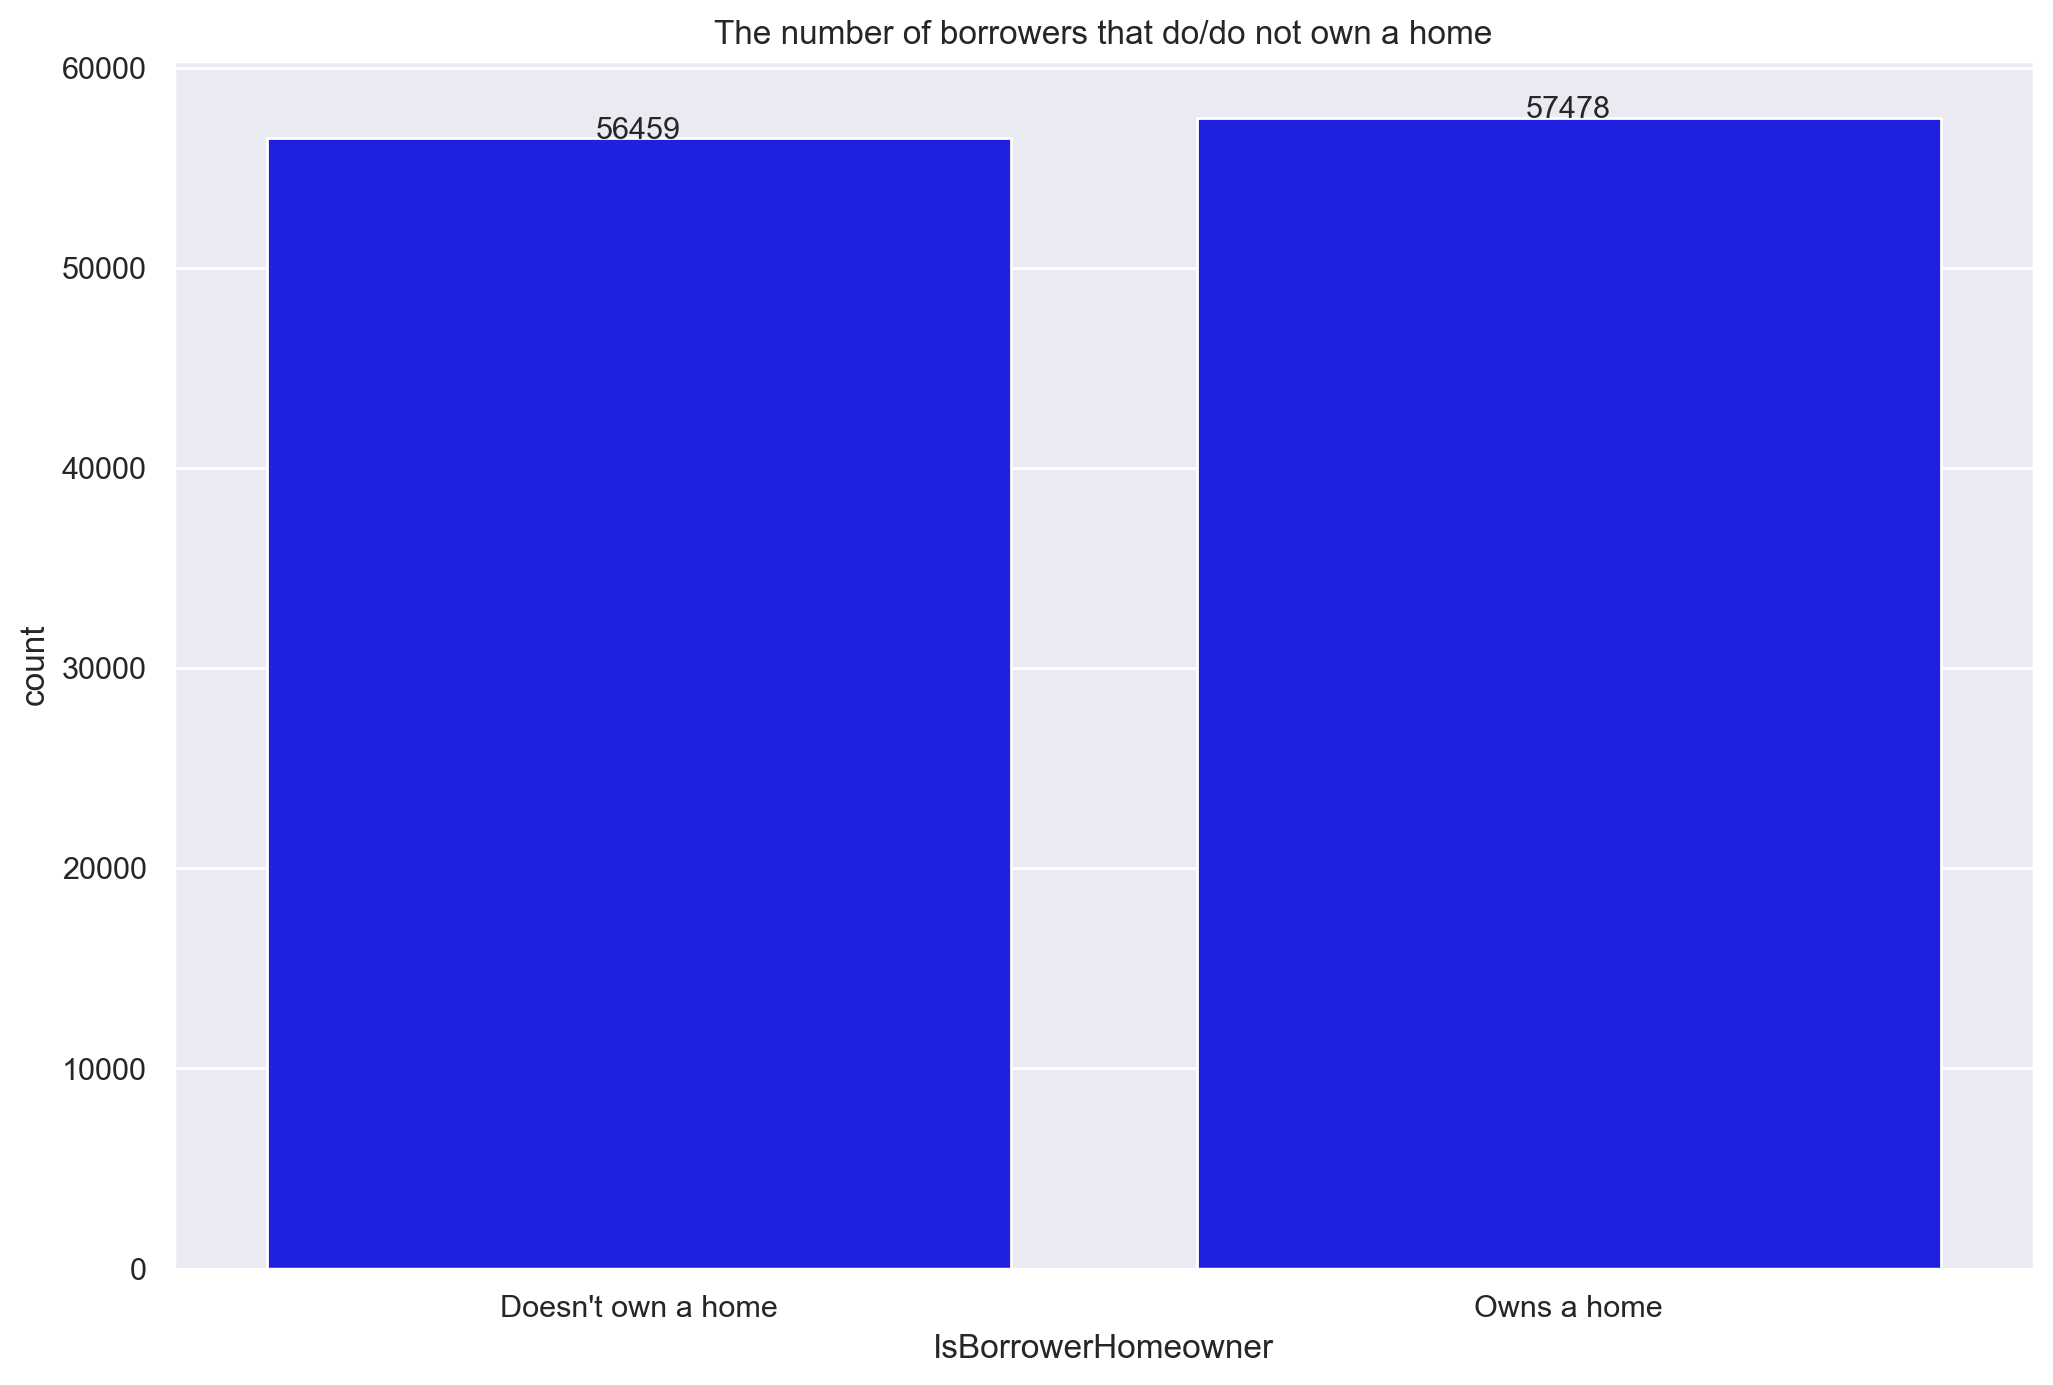

In [20]:
#visualizing the number of borrowers that are home owners vs those that aren't.
ax = sb.countplot(data=loan_df, x='IsBorrowerHomeowner', color = 'blue')
ax.set_title('The number of borrowers that do/do not own a home')
xlabels = ['Doesn\'t own a home', 'Owns a home']
ax.set_xticklabels(xlabels)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),
             horizontalalignment='center', fontsize = 11)
plt.show()

The proprtion of borrowers that own a home and those that do not are almost equal.

In [21]:
#getting the value counts in the 'EmploymentStatus' column
loan_df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

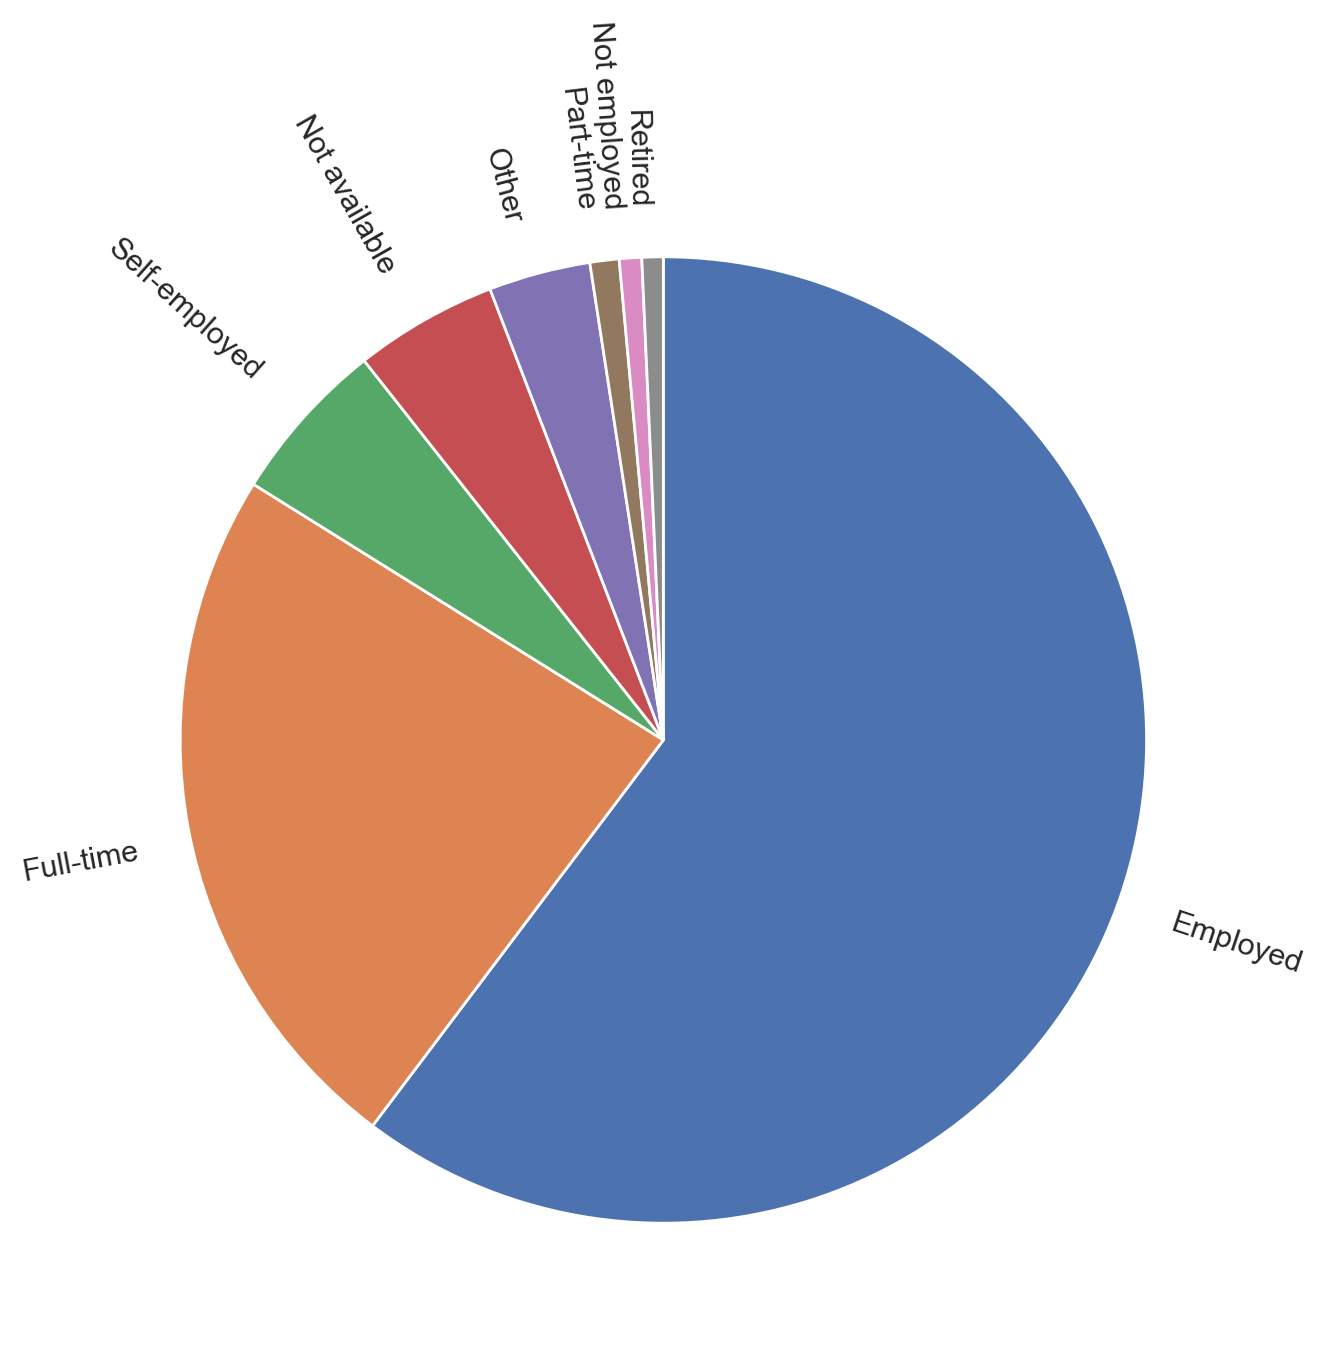

In [22]:
#plotting the employment status column to see its distribution
employment_status = loan_df['EmploymentStatus'].value_counts()
plt.pie(employment_status,  labels = employment_status.index,
        startangle = 90, counterclock = False, rotatelabels=True);


A visibly large proportion of loans were given to employed people, with fewer loans given to retired, and unemployed people. The pie chart is not as explicit as I would like it to be, so I'm going to use a countplot to visualize the distribution better. 

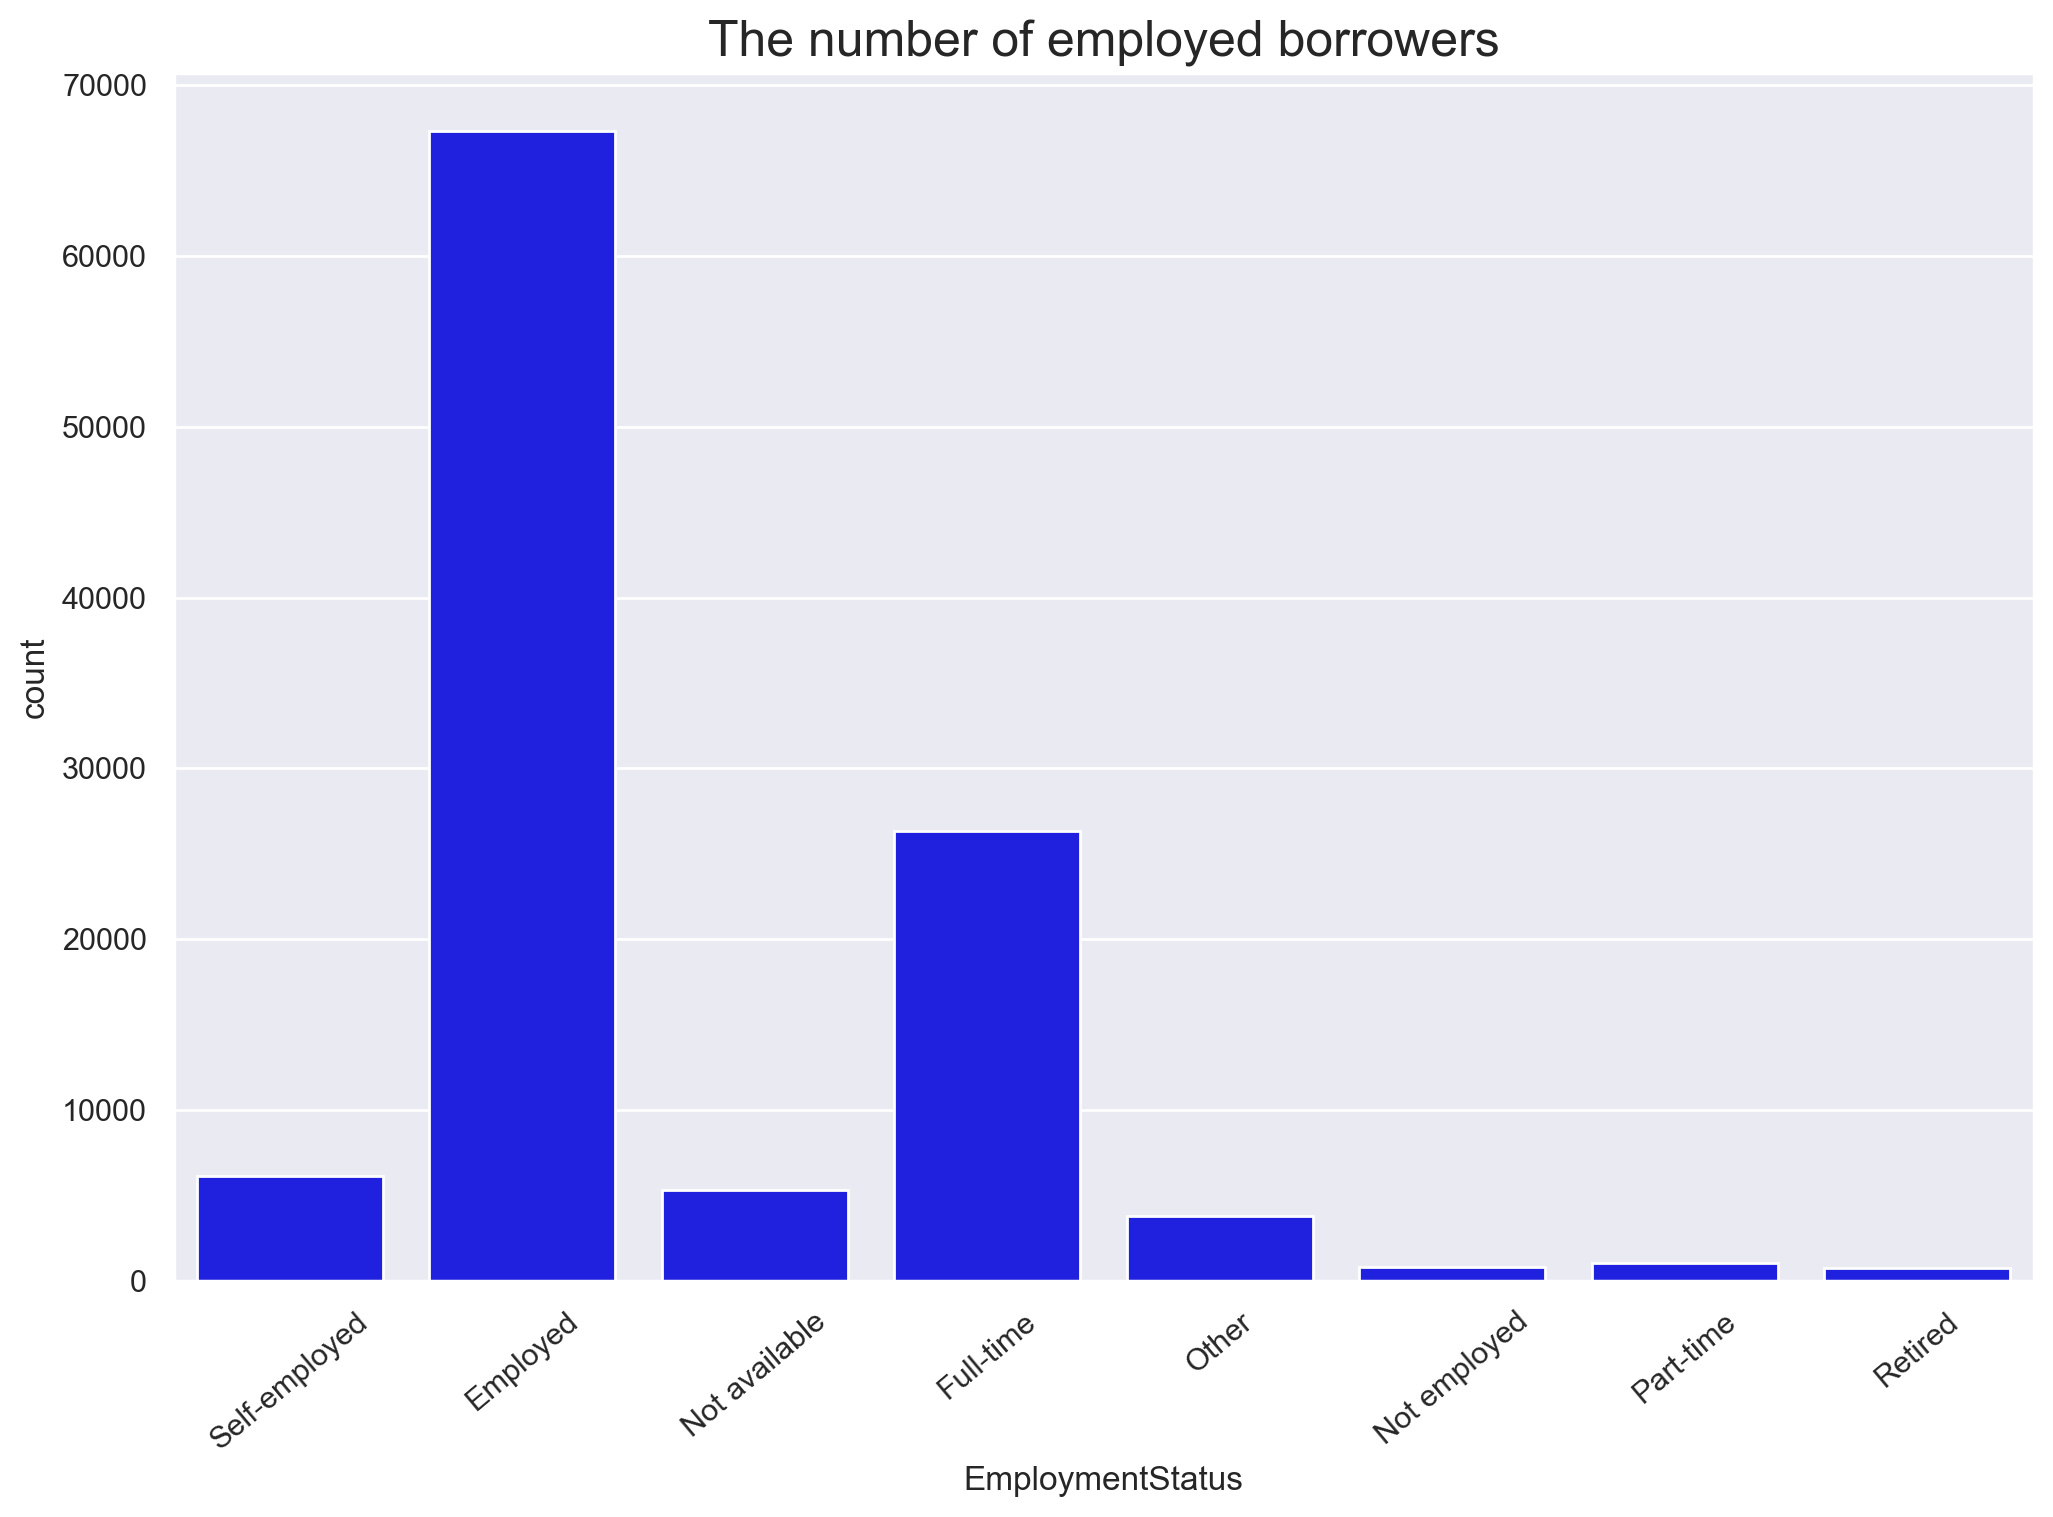

In [23]:
#plotting to see the proportion of borrowers that are employed
ax = sb.countplot(data=loan_df, x='EmploymentStatus', color = 'blue')
ax.set_title('The number of employed borrowers', fontsize = 18)
plt.xticks(rotation = 40)
plt.show()

There's still an issue with the visualization of this variable - a long tail, so I'll plot it on a log scale. 

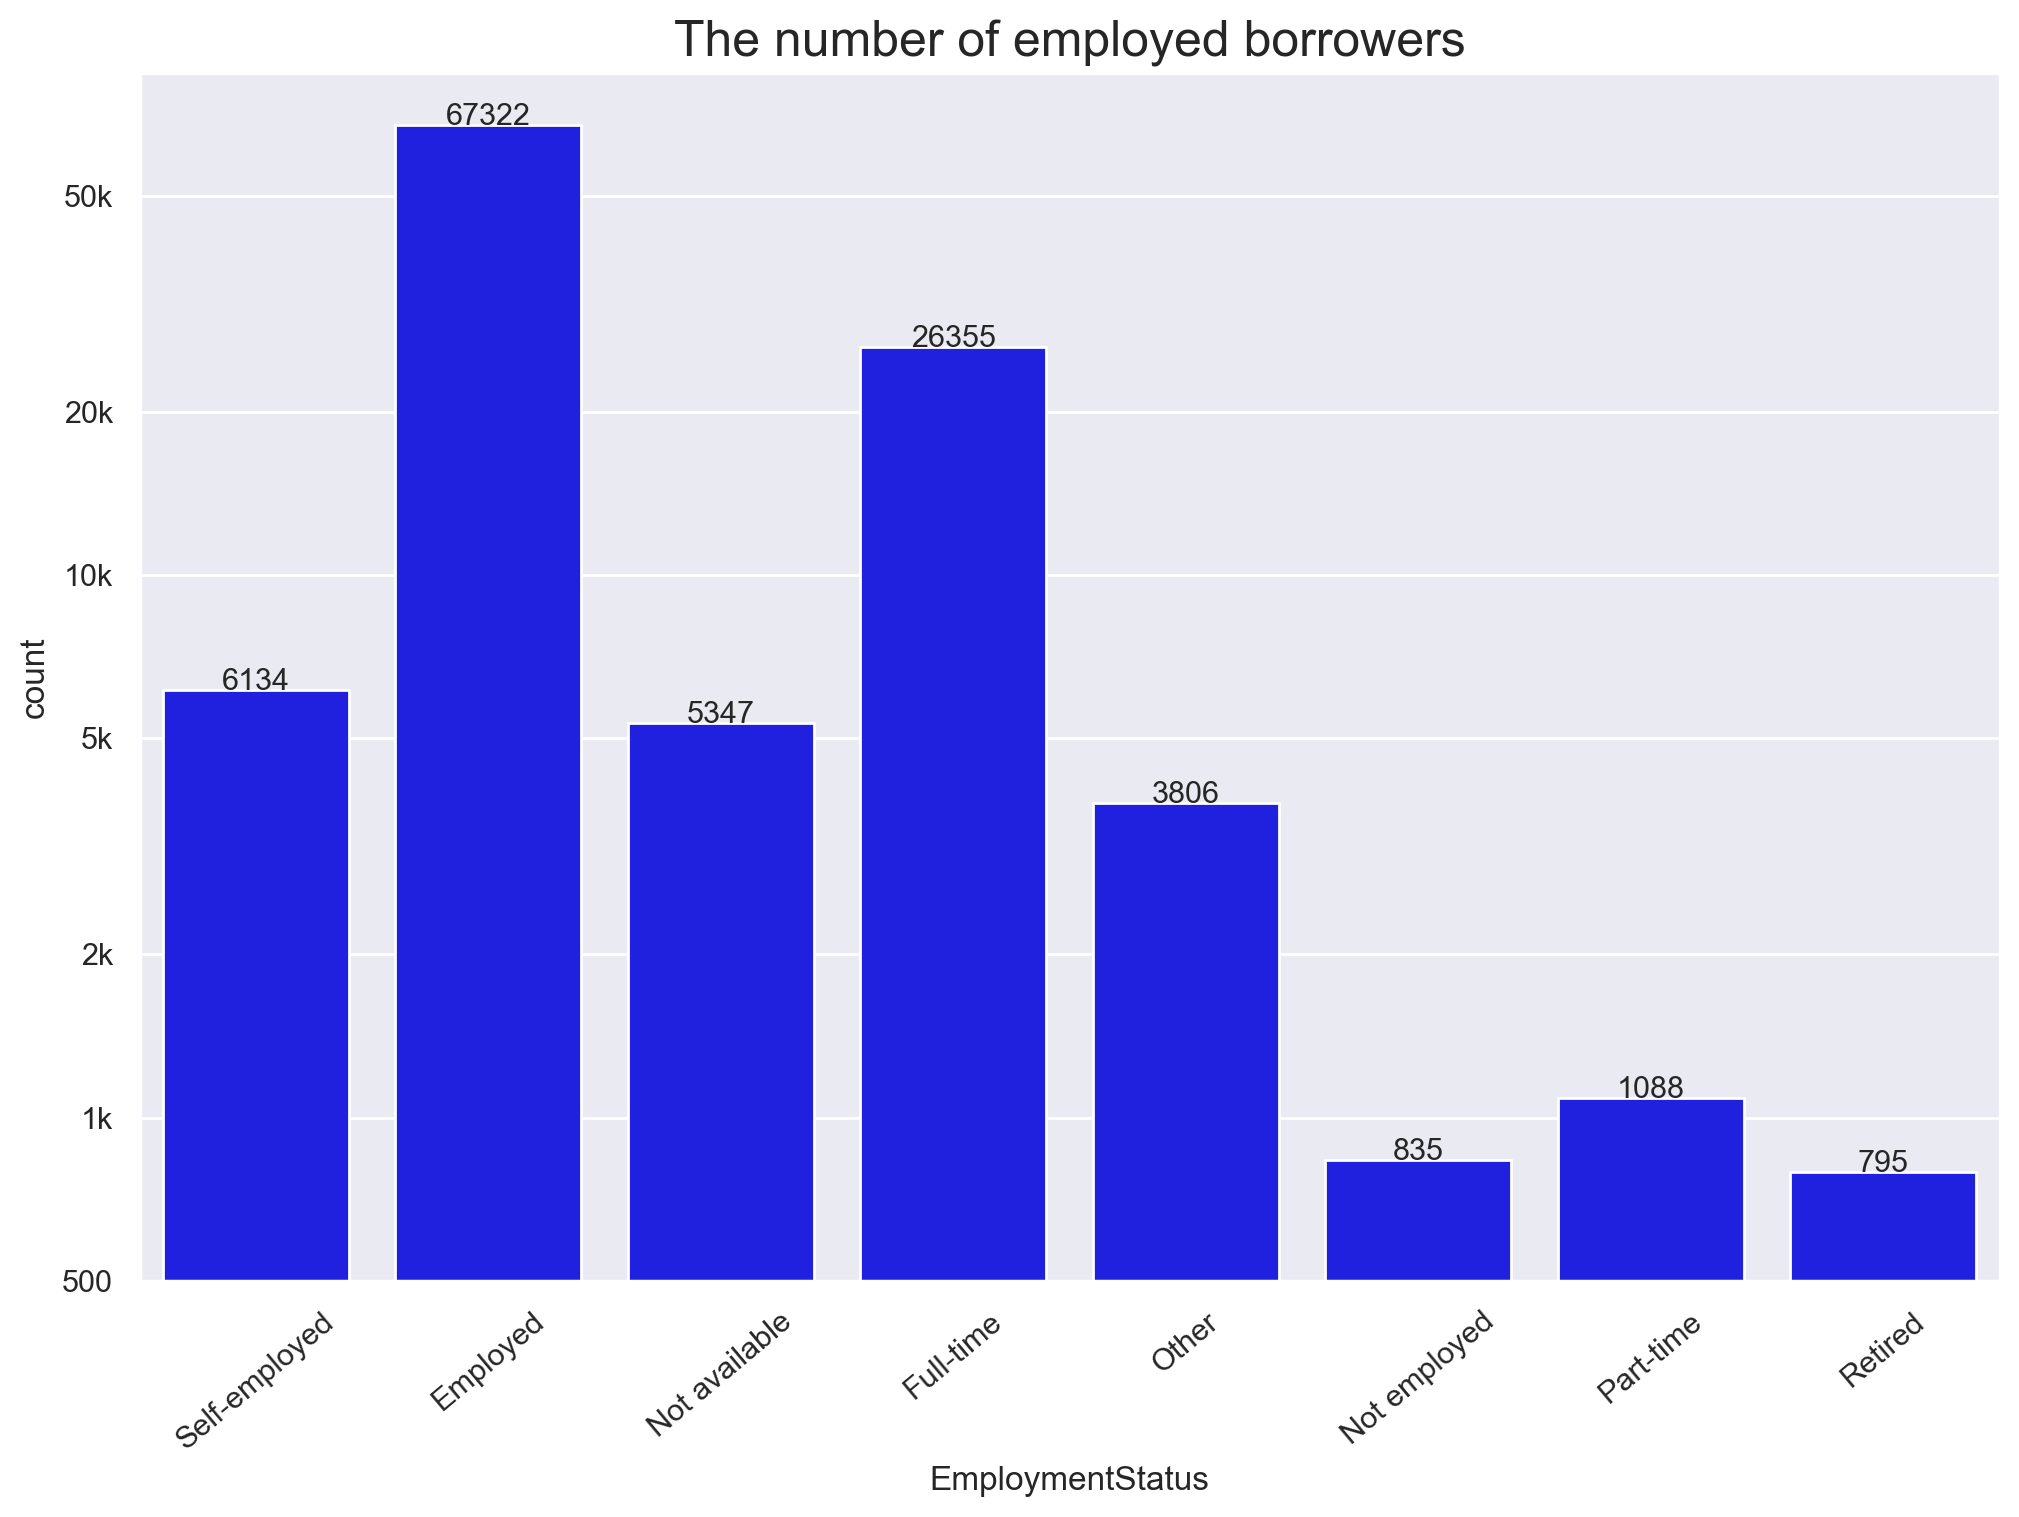

In [24]:
#plotting to see the proportion of borrowers that are employed
ax = sb.countplot(data=loan_df, x='EmploymentStatus', color = 'blue')
ax.set_title('The number of employed borrowers', fontsize = 18)
plt.xticks(rotation = 40)
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k'])
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),
             horizontalalignment='center', fontsize = 11)

plt.show()

It looks a lot better now, we can also see the count of each value above the bars. People with full-time employment recieved more loans than those with part-time employment.

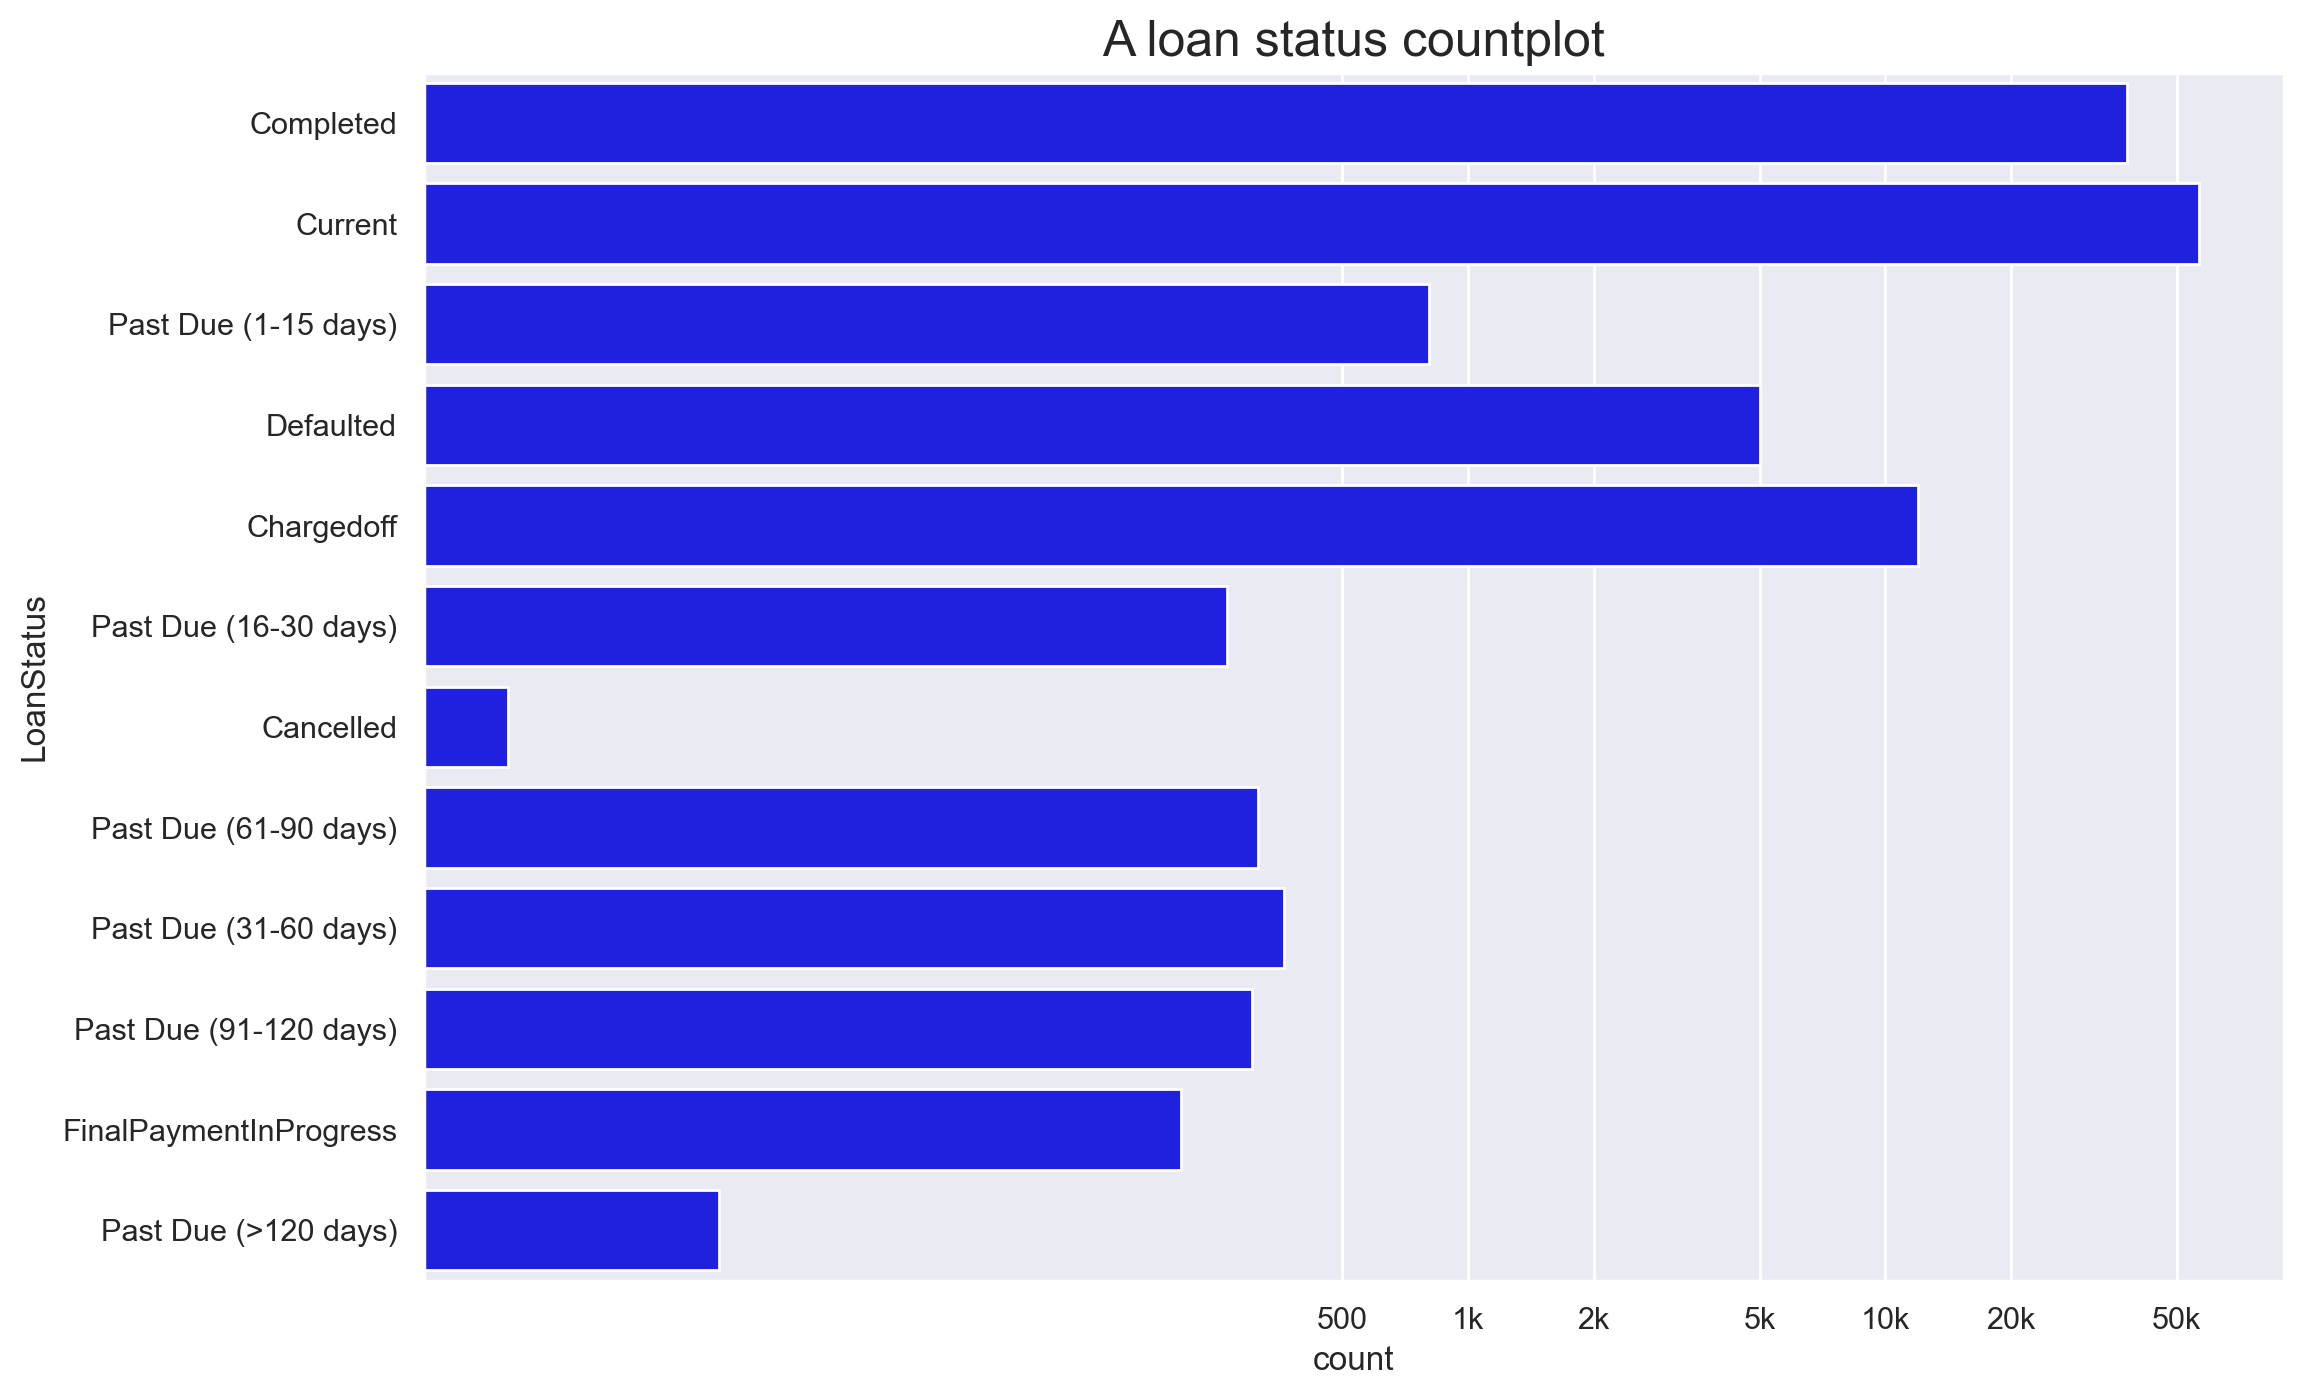

In [25]:
#plotting to see the distribution of the loan status column
ax = sb.countplot(data=loan_df, y='LoanStatus', color = 'blue')
ax.set_title('A loan status countplot', fontsize = 18)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k'])
plt.show()

From the countplot above, most of the loans are either current or completed, with over 5k loans that have been charged off. About 5k loans have a defaulted status.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the loans given out by Prosper Loan had a status of "completed" and "current", and around 5k loans had a status of "defaulted". From the histogram plot of the employment duration, most loans were taken out by people who had been working for 30 months or less. Debt consolidation was by far the most common reason that borrowers took out loans. The employment duration and employment status columns both had long tails with certain values, which made me to plot them using a log transform scale.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Asides from the columns that had long tail values, there were no unusual distributions in my univariate analysis. 
<br> 
Some columns were names didn't follow the python conventional naming protocol. I renamed those columns(ListingCategory (numeric)': 'ListingCategory',
                         'ProsperRating (numeric)',
                         'ProsperRating (Alpha)',
                         'TradesNeverDelinquent (percentage)') before being able to plot visualizations on them. I changed the datatype of the "DataCreditPulled" column in order to be able to reference the values as a Datetime format for accurate analysis.

## Bivariate Exploration
In this section, I'll be finding out useful insights on my variables of interest, and how other variables inflence or relate to them. My exploration will be focused on 2 variables at a time, asking questions before each visualization.

### Question
Do unemployed people tend to default in loan payoffs?

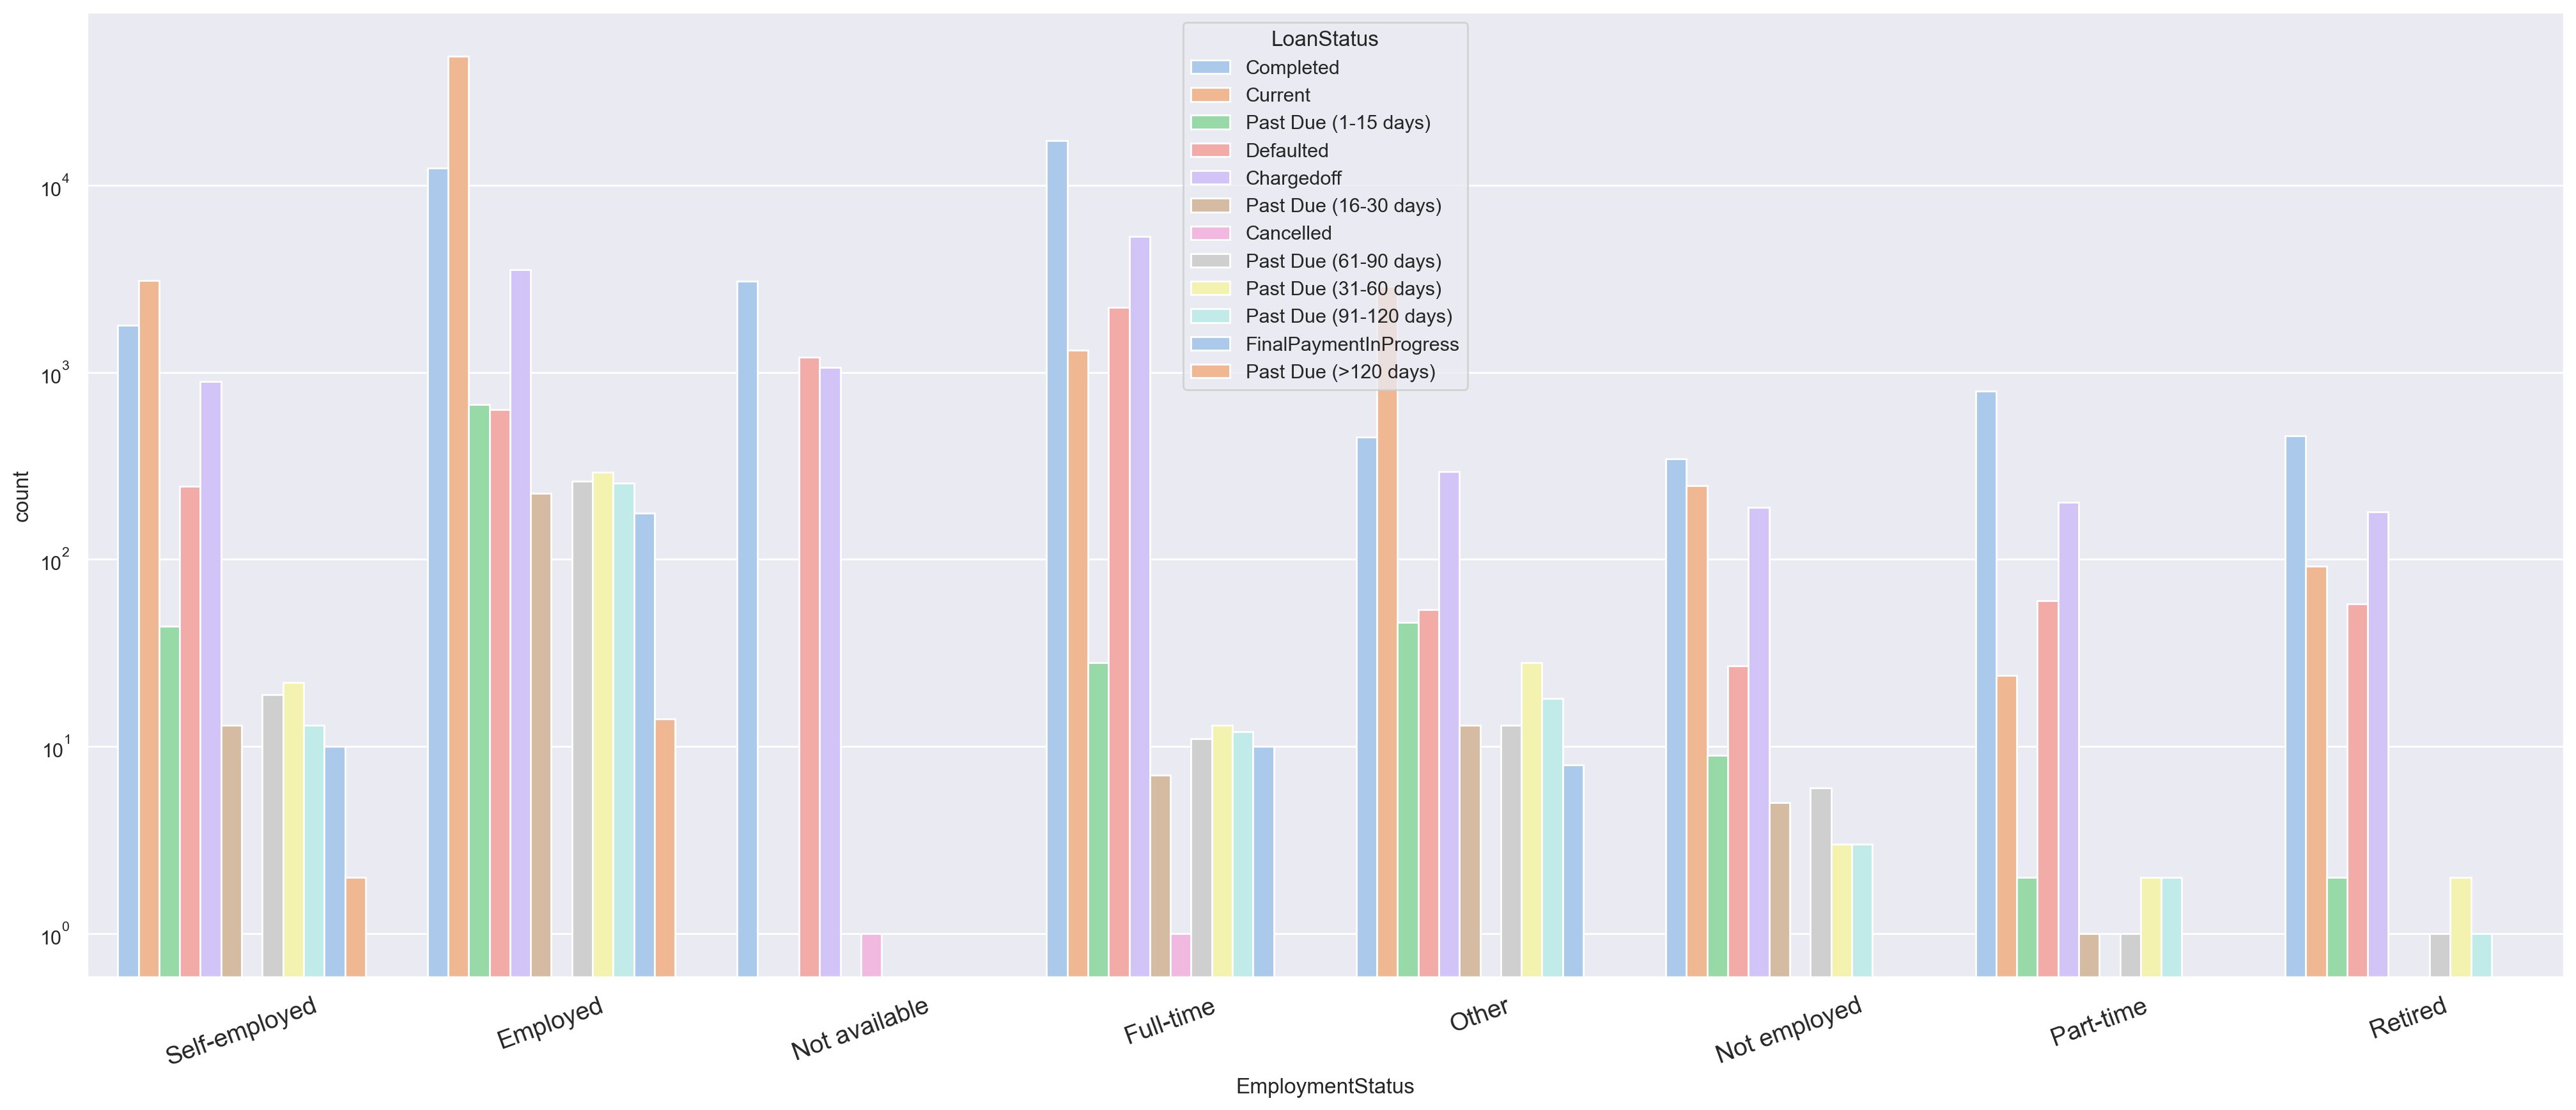

In [26]:
#LoanStatus EmploymentStatus
plt.figure(figsize=(25,10))
plt.xticks(rotation=20,  fontsize = 14)
sb.countplot(data = loan_df, hue = 'LoanStatus', x = 'EmploymentStatus', palette = 'pastel');
plt.yscale('log')


I would like to see the proportions of the loan status values of borrowers in each employment status category, for that, I'd define a function to get the proportion of each value in the loan status, and plot a bar chart of the employment status column, grouped by the loan status column.

In [27]:
#a function to get the proportions of loan status by employment status
def variable_proportions(column, DataFrame, hue):
    TotalValues_forEachCategory = DataFrame.groupby([column])[hue].count()
    valuesFor_LoanStatus = DataFrame.groupby([column, hue])[hue].count()
    proportions = valuesFor_LoanStatus / TotalValues_forEachCategory
    return proportions



In [28]:
#a function to plot the proportions loan status by the employment status
def proportions_plot(proportions, column_names):
    # Proportions come from get_propotion function.
    proportions.unstack().plot(kind='bar');
    plt.ylabel('Proportions')
    plt.title(f'The relationship between {column_names} and loan status', fontsize=15, )

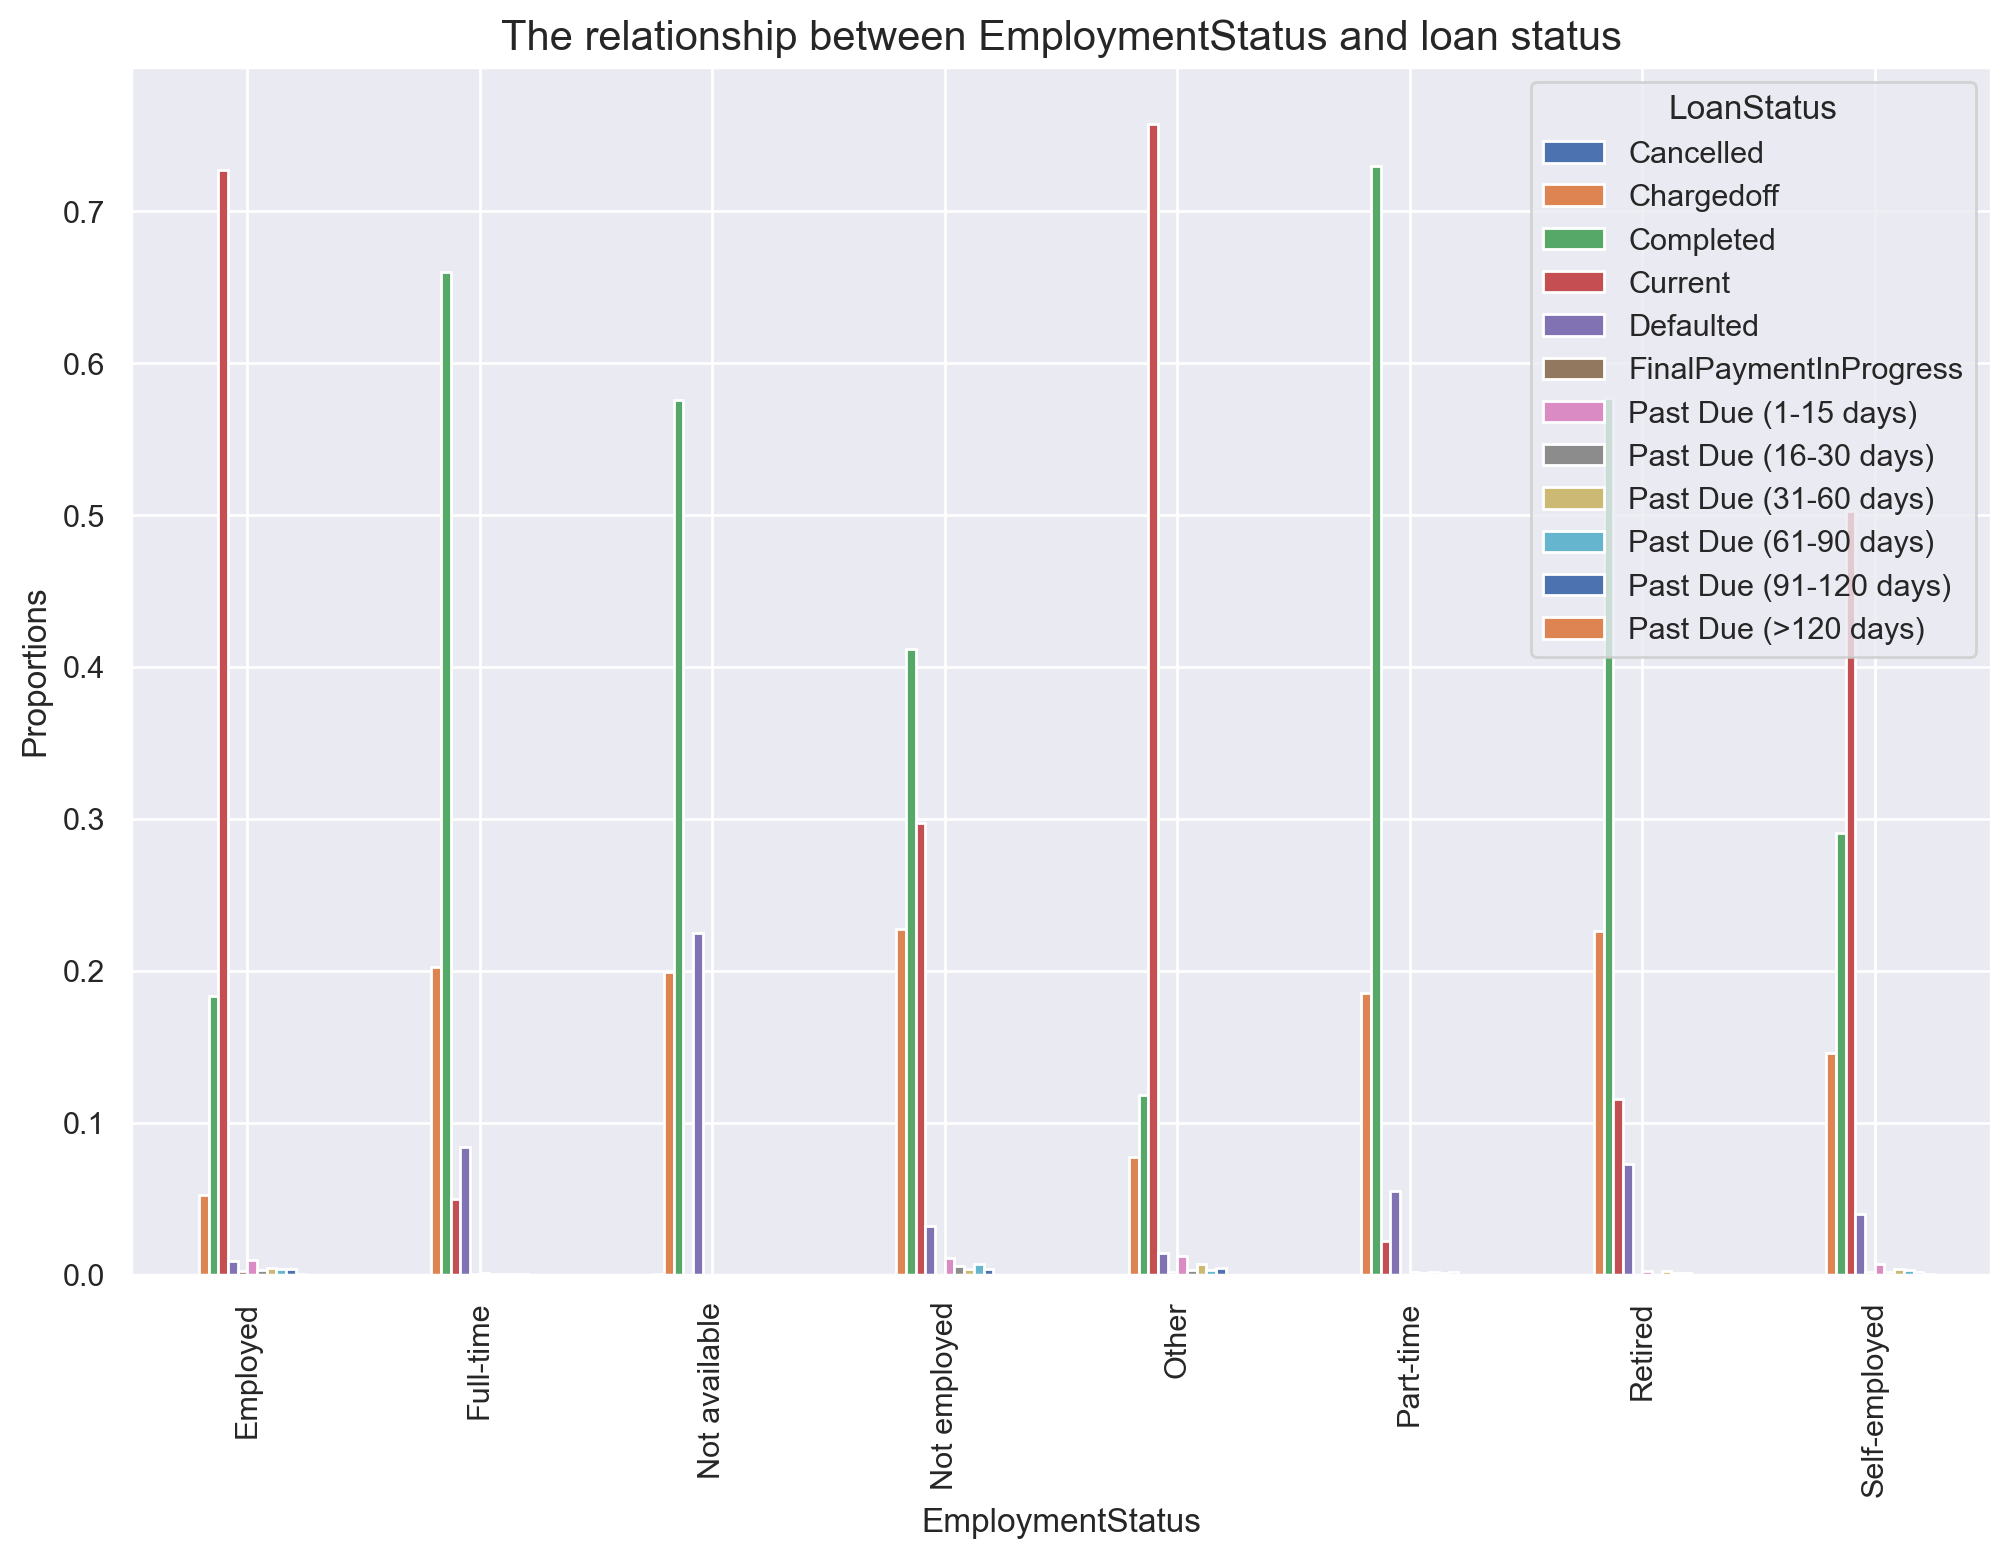

In [29]:
#calling both functions on the employment status column
proportions = variable_proportions('EmploymentStatus', loan_df, 'LoanStatus')
proportions_plot(proportions, 'EmploymentStatus')


The plot above appears to be too clustered to convey meaningful insights on how the employment 
status of a loan relates to its loan status. Since I'm particularly interested in knowing the proportions of only those that completed and defaulted, I'll plot just those values, hence, producing a less dense plot that's easier to interpret.

In [30]:
#creating a new column for loans status where the value is either 'Completed' or 'Defaulted'
new = loan_df.query('LoanStatus == "Completed" | LoanStatus == "Defaulted"')
loan_df['newStatus'] = new['LoanStatus']

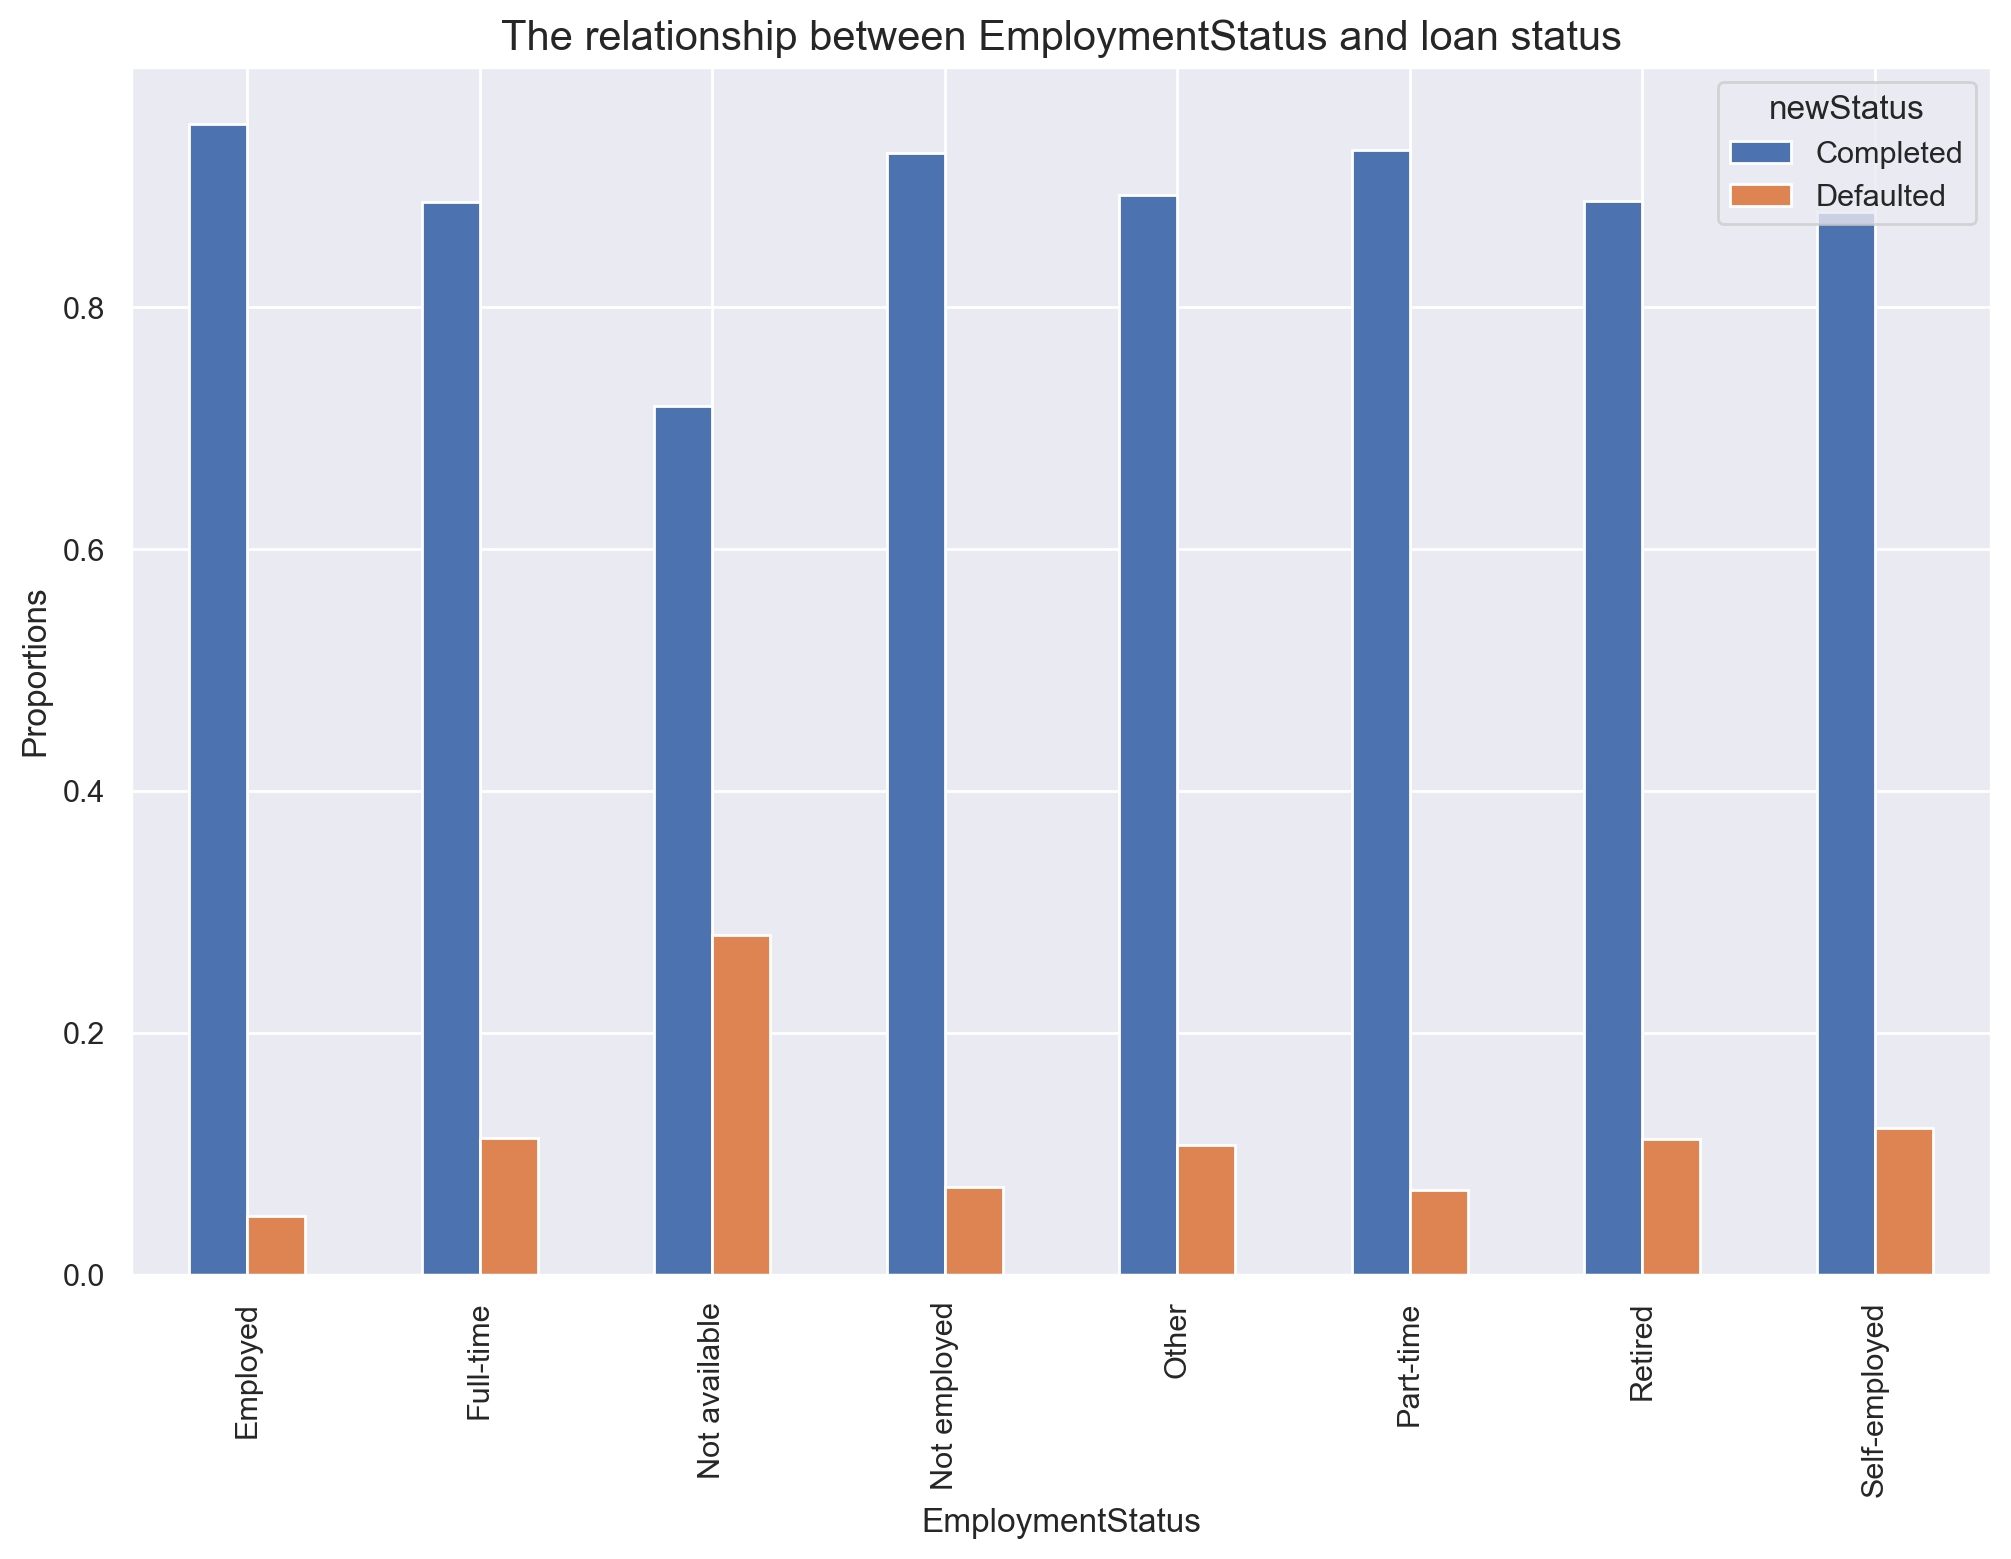

In [31]:
#calling the functions for plotting the proportions of loan status values on the new column
proportions = variable_proportions('EmploymentStatus', loan_df, 'newStatus')
proportions_plot(proportions, 'EmploymentStatus')

From the figure above, the employment status doesn't seem to have any relationship with a borrower defaulting in loan payment. Over 80% of borrowers in each category completed their loan payment when compared to those who defaulted in their payment.

### Question
What kind of loan do borrowers in the different employment statuses tend to take?

In [32]:
#converting the datatype of the values in the 'ListingCategory' column from integar to str
loan_df['ListingCategory'] = loan_df['ListingCategory'].astype('str')

In [45]:
#testing the code
loan_df['ListingCategory'].describe()

count     113937
unique        21
top            1
freq       58308
Name: ListingCategory, dtype: object

In [34]:
#getting the order to use for the x ticks labels
loan_df['ListingCategory'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

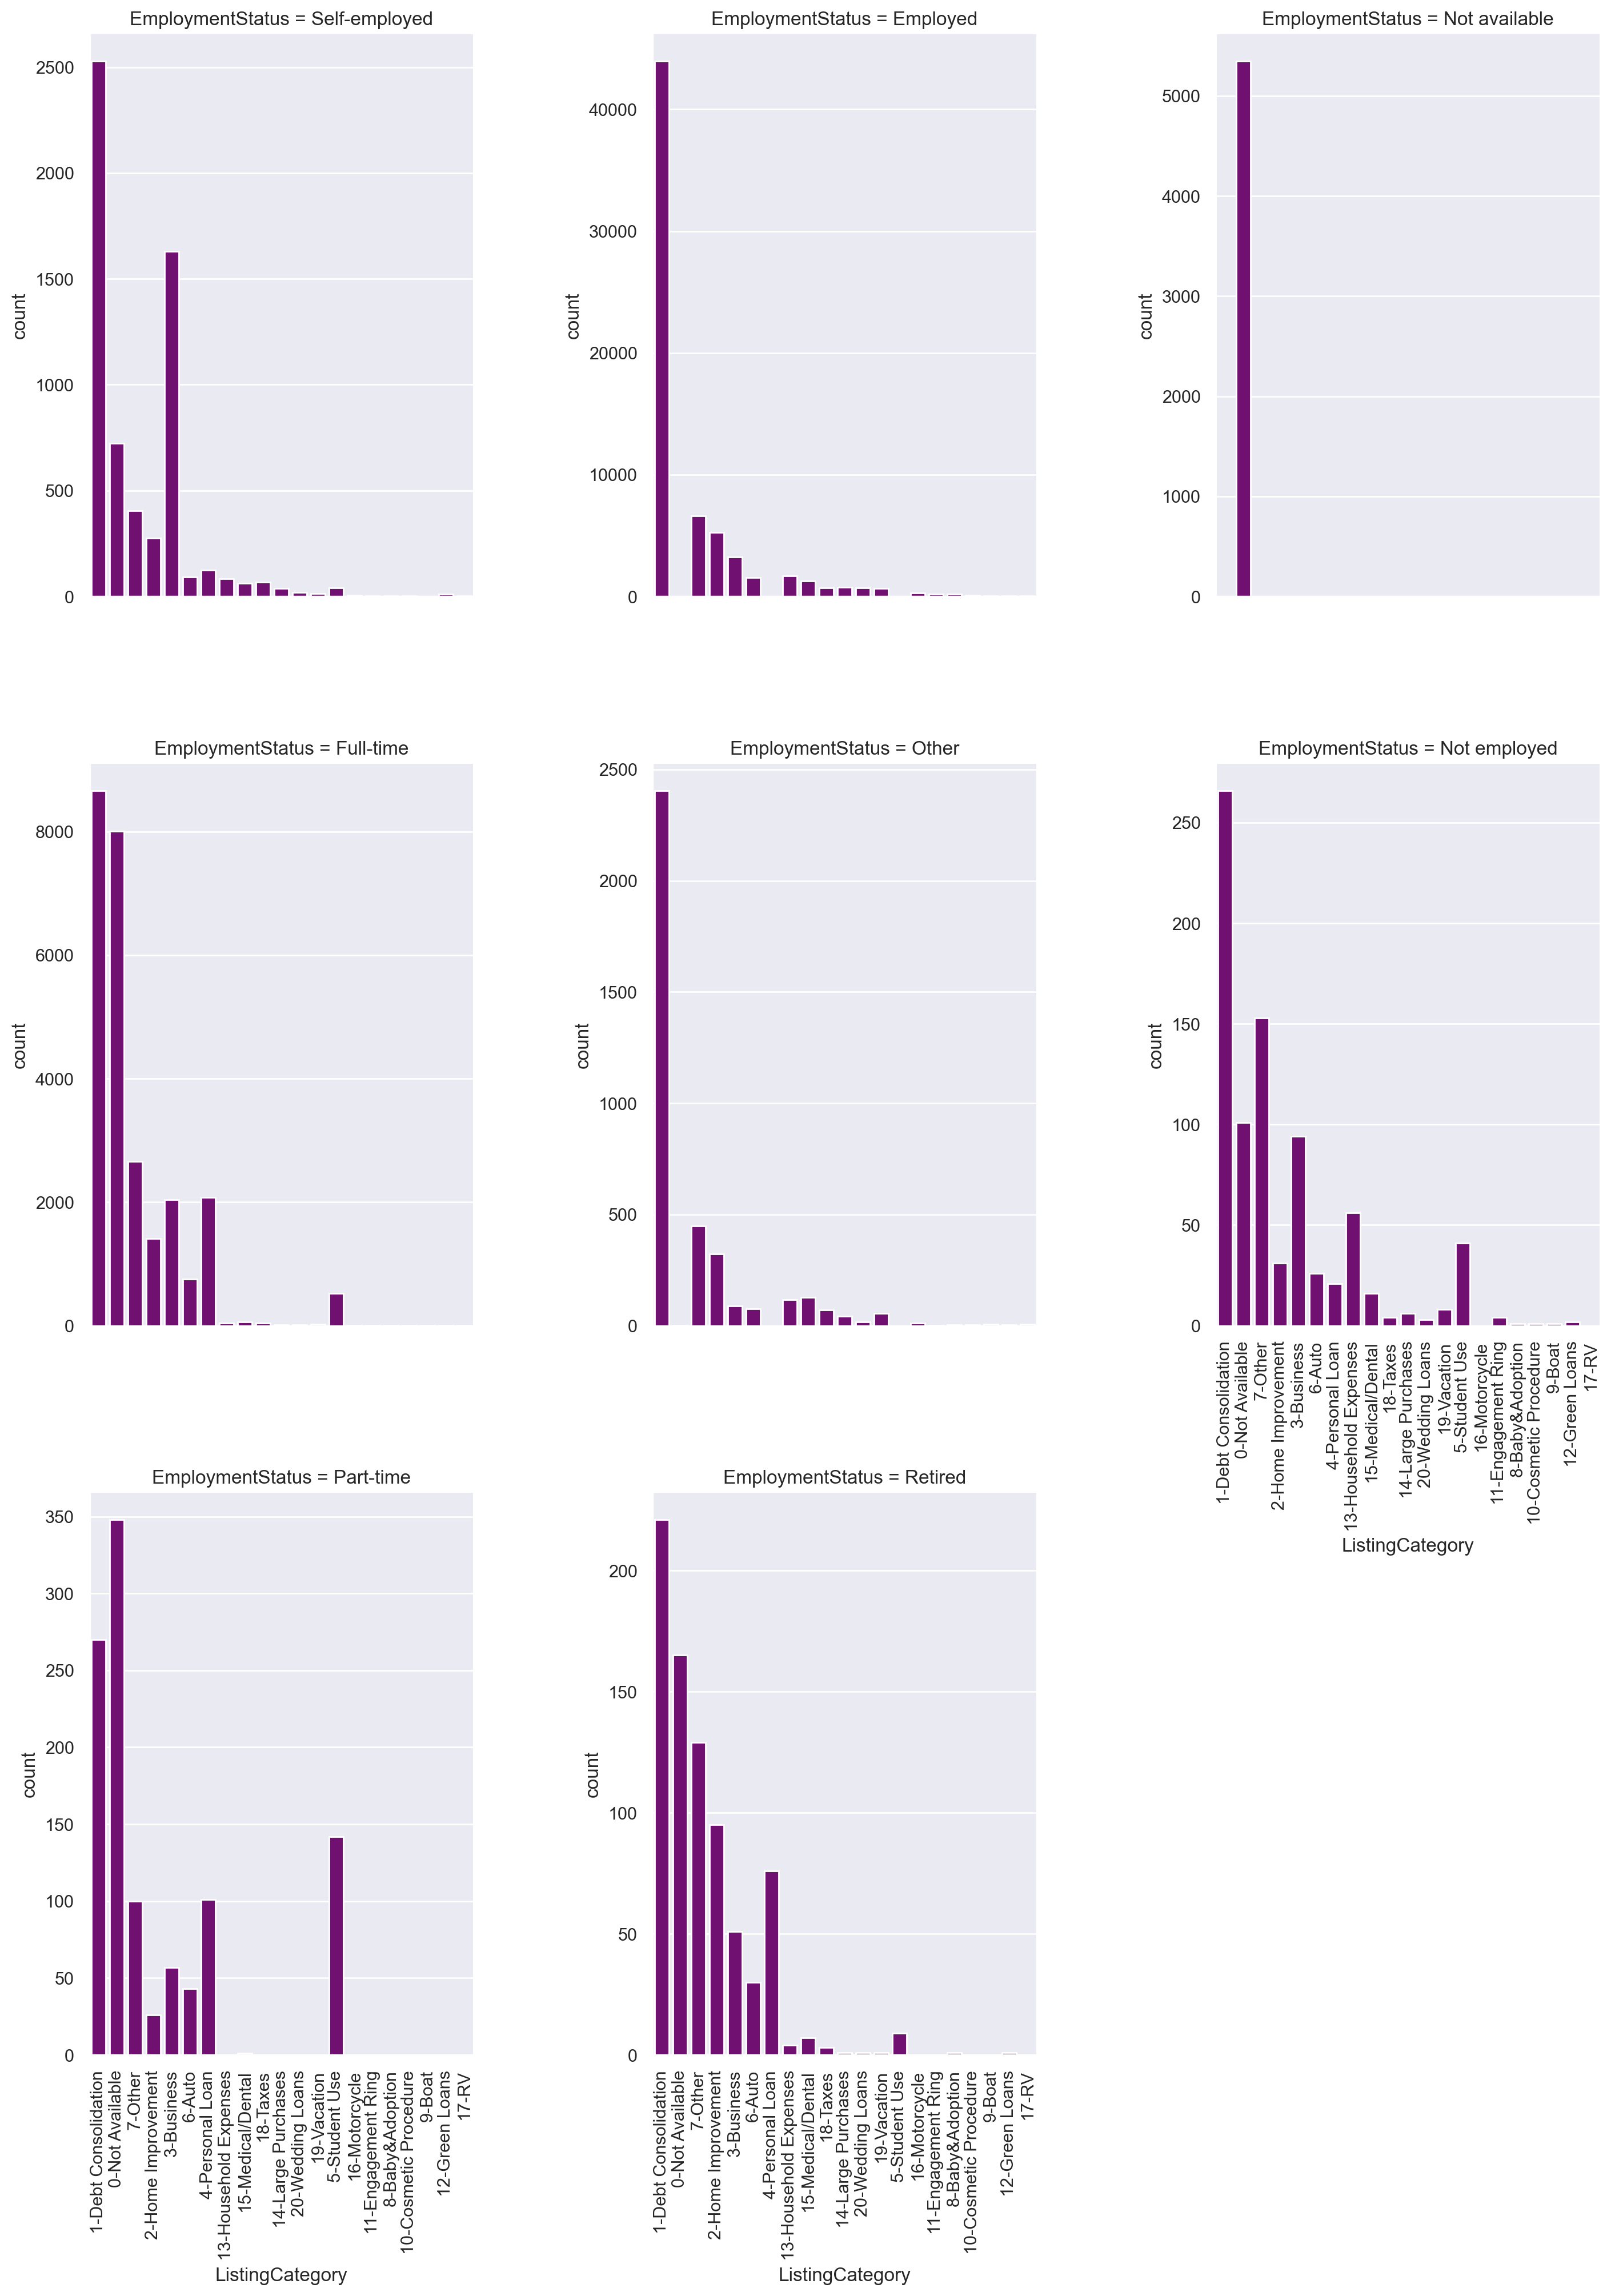

In [35]:
#facet grid plots of the relationship between listing category and employment status

#facet grid countplot
g = sb.FacetGrid(data = loan_df, col = 'EmploymentStatus' , col_wrap=3, sharey=False)
g.map(sb.countplot,'ListingCategory', order=loan_df['ListingCategory'].value_counts().index, color='purple')
g.fig.set_size_inches(15,20)
g.set_xticklabels(['1-Debt Consolidation','0-Not Available','7-Other', '2-Home Improvement', '3-Business', '6-Auto', 
                   '4-Personal Loan', '13-Household Expenses','15-Medical/Dental', '18-Taxes', '14-Large Purchases',
                   '20-Wedding Loans', '19-Vacation', '5-Student Use', '16-Motorcycle', '11-Engagement Ring', 
                   '8-Baby&Adoption', '10-Cosmetic Procedure',  '9-Boat', '12-Green Loans', '17-RV'])
#rotating the x tick labels
for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

plt.show()

While debt consolidation was the number one reason people took out loans(regardless of their employment status), a higher proportion of self-employed people took out more business loans compared to people from other categories of employment. 'Student use' was the second most common reason borrowers with part-time employment took out loans.

###  Question
How does the loan amount of a loan affect its APR?

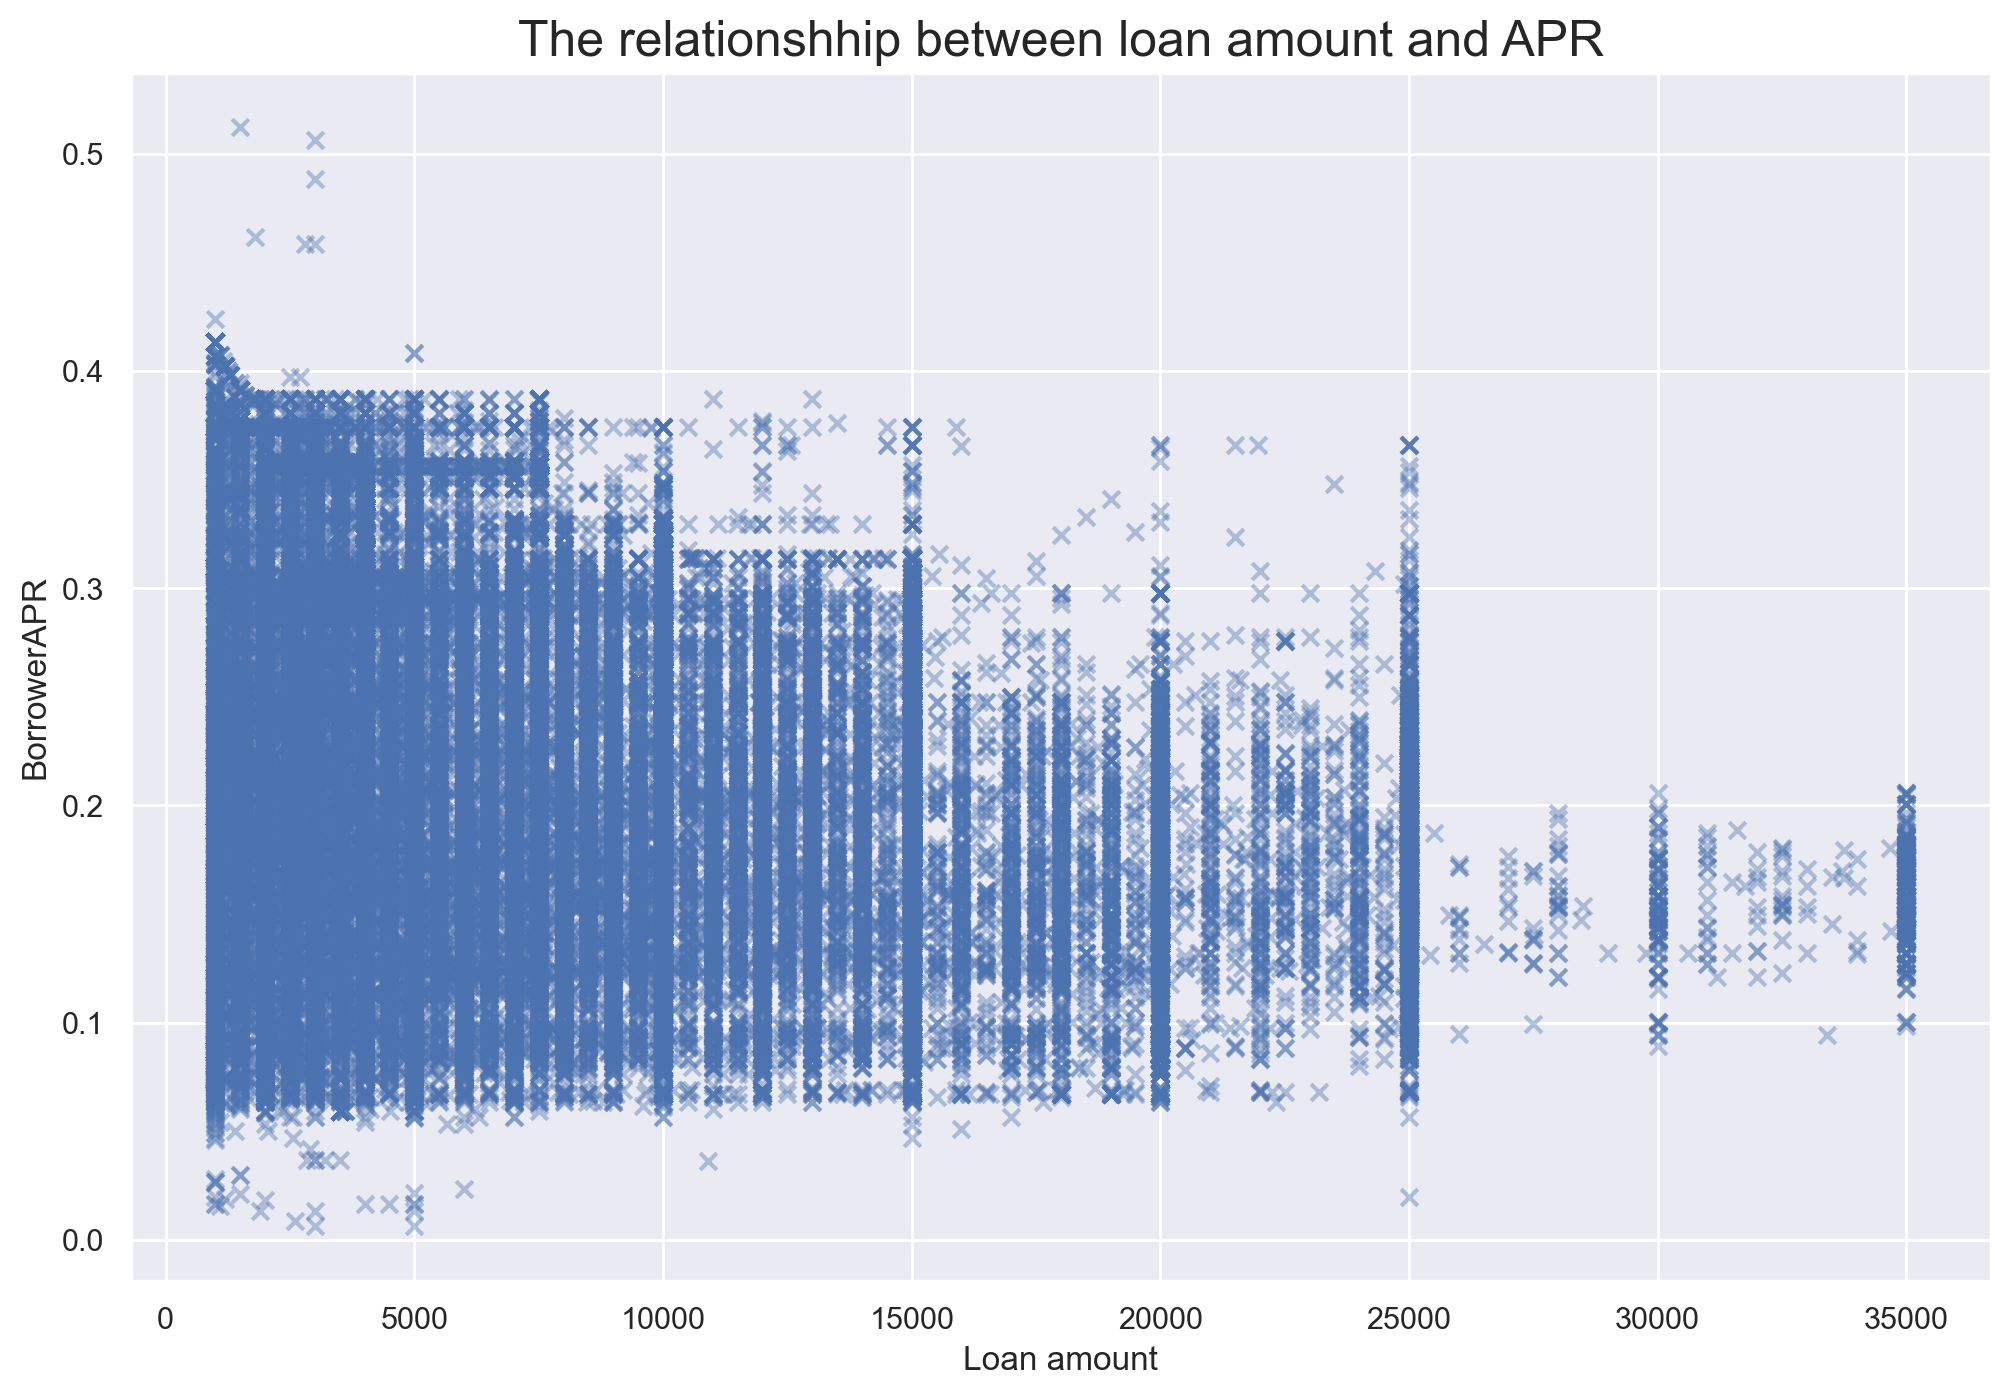

In [36]:
#plotting the relationship between loan amount and borrower APR
plt.scatter(x = loan_df['LoanOriginalAmount'], y = loan_df['BorrowerAPR'], color = 'b', marker = 'x', alpha = 0.4)
plt.xlabel('Loan amount')
plt.ylabel('BorrowerAPR')
plt.title('The relationshhip between loan amount and APR', fontsize = 18)
plt.show()

There doesn't seem to be a positive linear relationship between the loan amount and borrower APR, but we can deduce that higher loan amounts generally have lower borrower APR.

### Question
What is the relationship between the loan amount and its status outcome

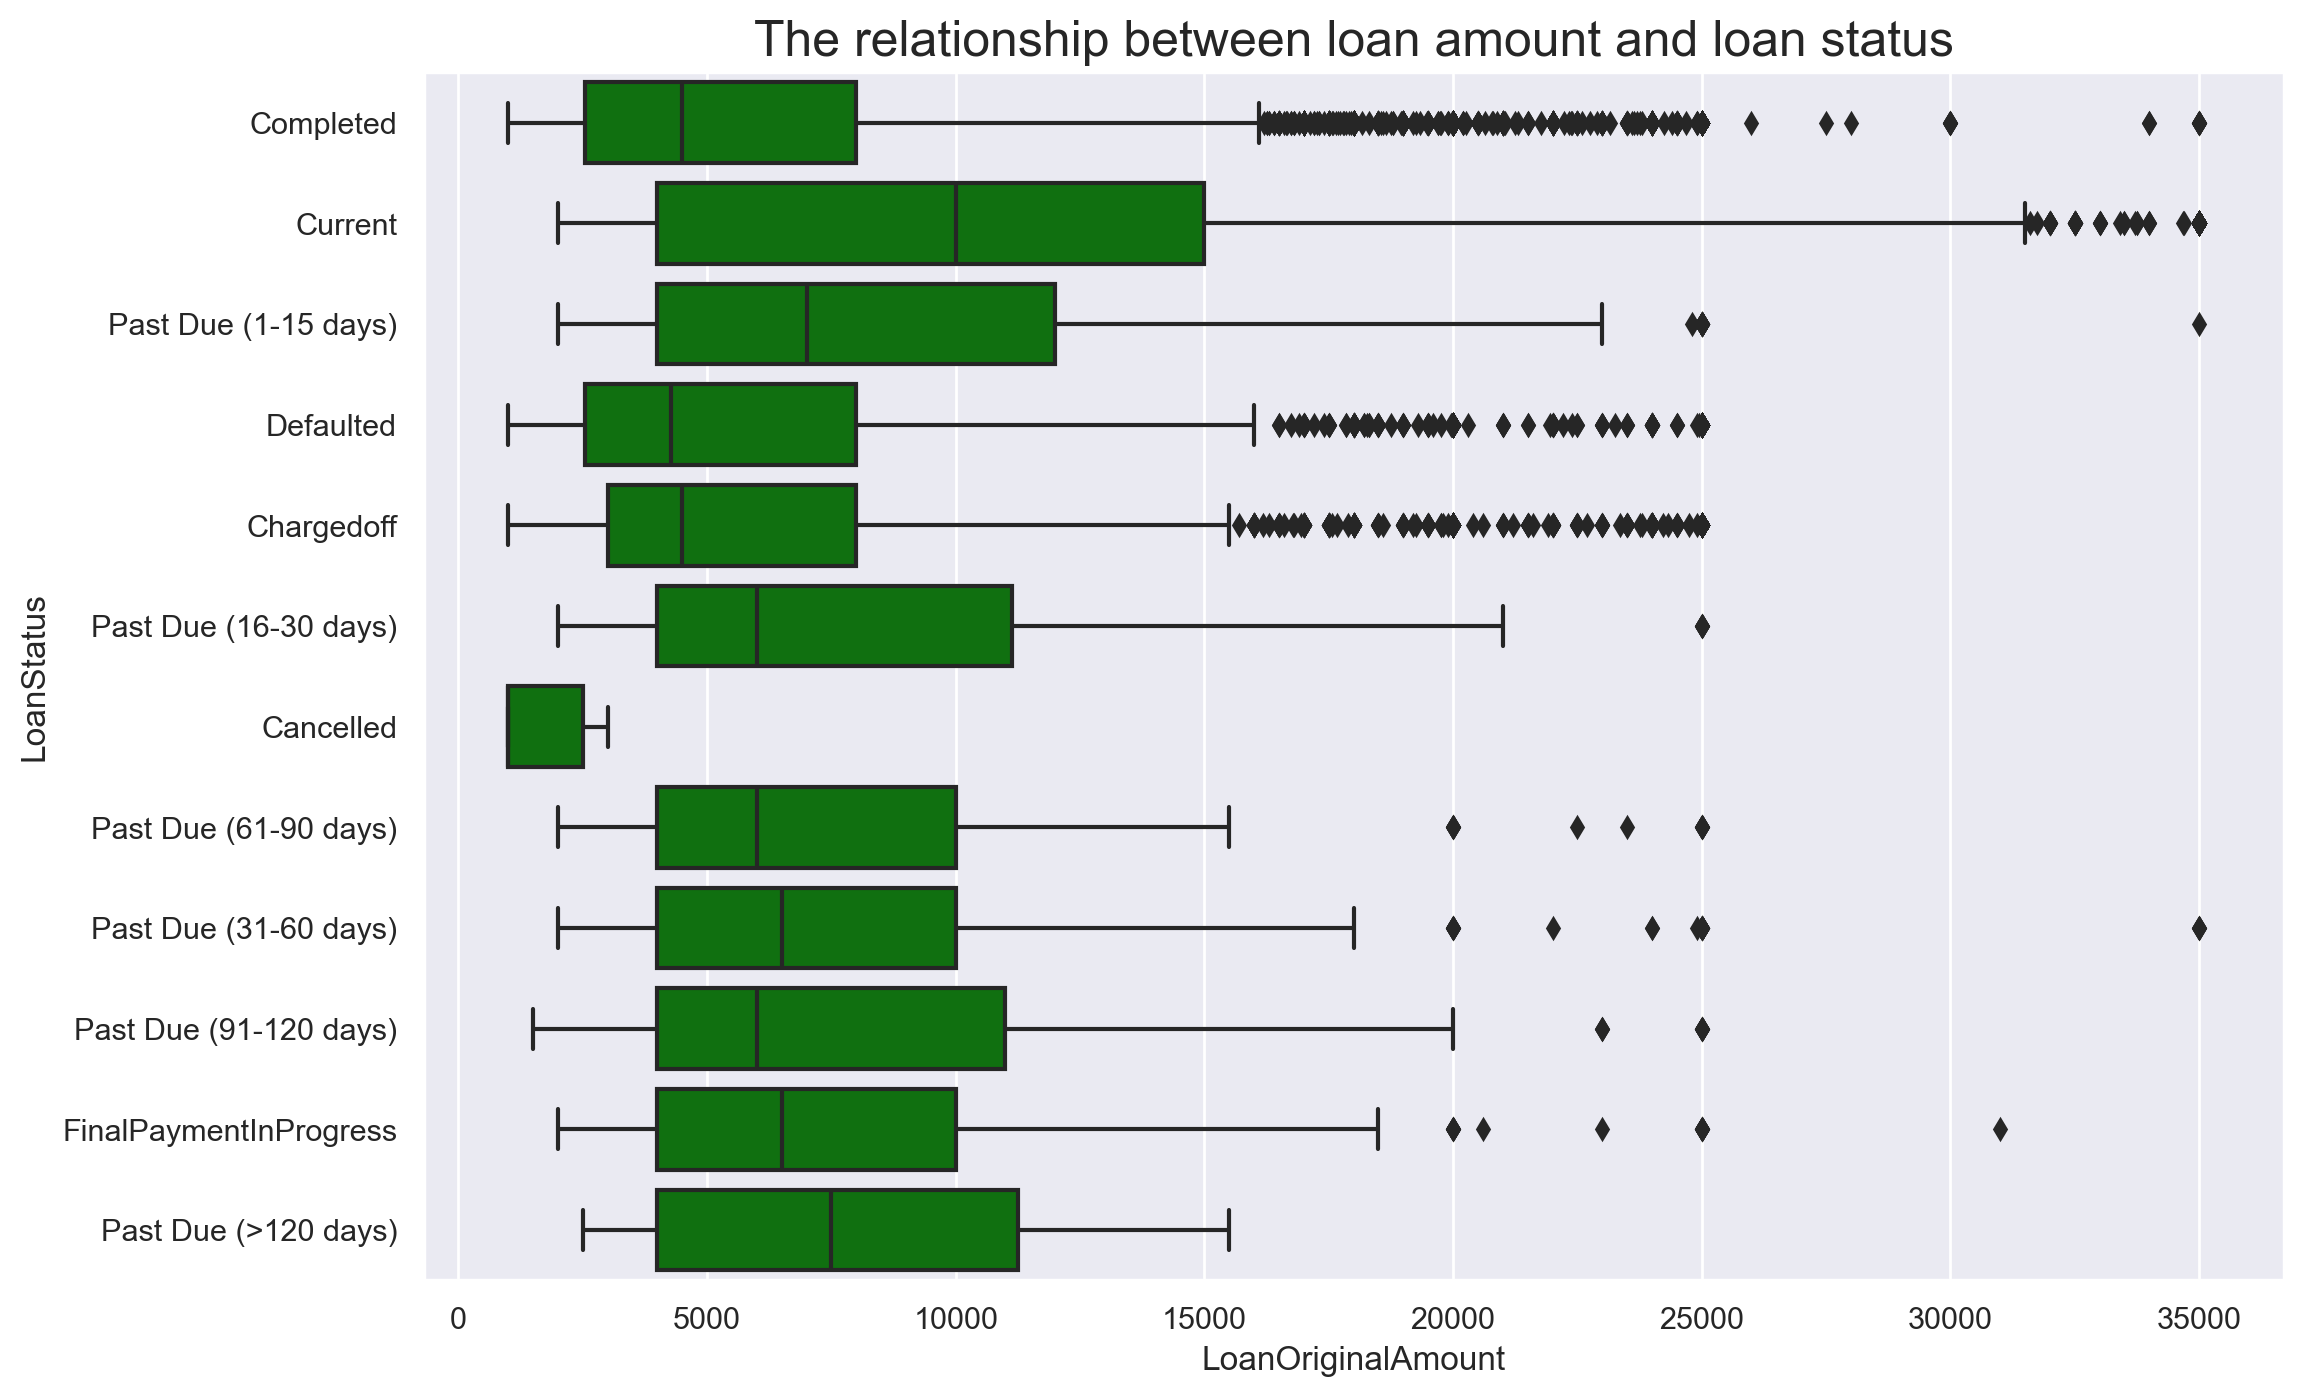

In [37]:
#plotting the relationship between loan amount and loan status
sb.boxplot(x=loan_df['LoanOriginalAmount'] , y = loan_df['LoanStatus'], color = 'green')
plt.title('The relationship between loan amount and loan status', fontsize = 18)
plt.show()

On thing stands out in this visualization - the loan amount of the loans that were cancelled. All the loans that were cancelled were under \$5000.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 The employment status doesn't seem to have any relationship with a borrower defaulting in loan payment. Over 80% of borrowers in each category completed their loan payment when compared to those who defaulted in their payment.
 
While debt consolidation was the number one reason people took out loans(regardless of their employment status), a higher proportion of self-employed people took out more business loans compared to people from other categories of employment. 'Student use' was the second most common reason borrowers with part-time employment took out loans.

All the loans that were cancelled were under \$5000, which most likely means that higher loan amounts usually do not get cancelled.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There doesn't seem to be a positive linear relationship between the loan amount and borrower APR, but we can deduce that higher loan amounts generally have lower borrower APR.

## Multivariate Exploration

In this section, I'll be creating visualizations with at least 3 variables, to discover even more insights from the ProsperLoan dataset. This is the final phase of my analysis for this project.

### Question
Does the number of recommendations a borrower has affect the loan status outcome and loan amount?

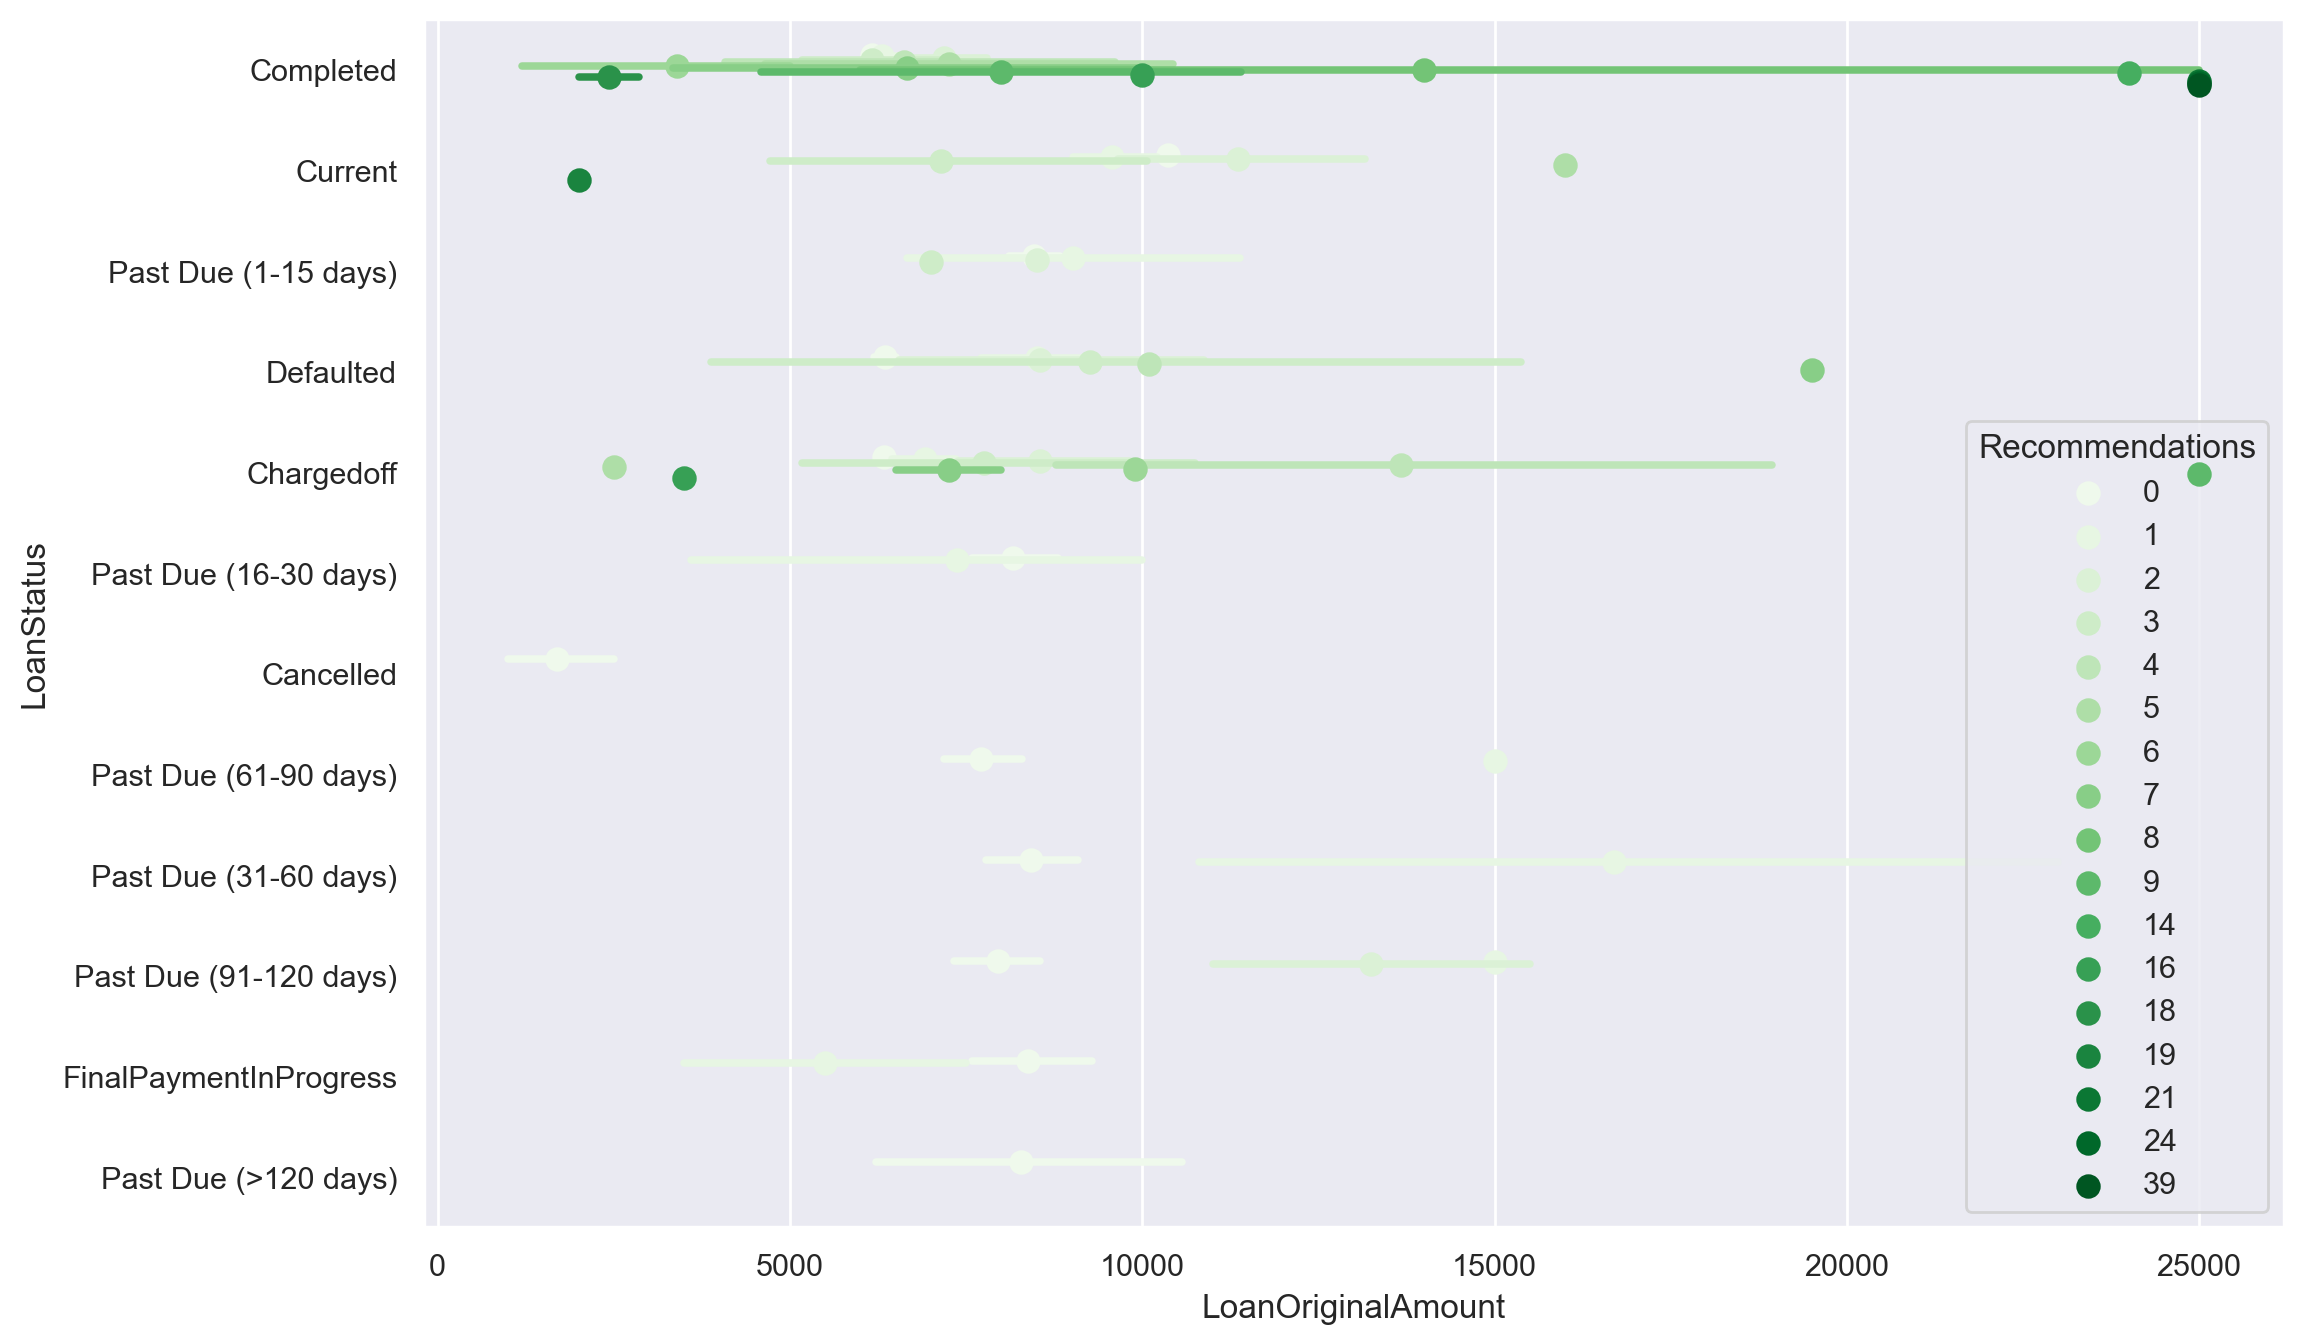

In [44]:
#creating a point plot
ax = sb.pointplot(data = loan_df, x = 'LoanOriginalAmount', y = 'LoanStatus', hue = 'Recommendations',
                  dodge = 0.3, linestyles = "", palette='Greens')
plt.show()

We can see that higher loan amounts that had more recommendations were completed. There appears to be a positive relationship between the three variables.

### Question
What is the relationship between the loan status(current and defaulted only), APR and listing category(debt consolidation, home improvement and business only)?

In [39]:
#creating a new column for listing category where the value is 
#1,2 or 3(representing debt consolidation, home improvement and business respectively)
listings = loan_df.query('ListingCategory == "1" | ListingCategory == "2"| ListingCategory == "3" ')
loan_df['topListings'] = listings['ListingCategory']

In [40]:
#renaming the values for semantics
replacements = {'1':'debt consolidation', '2':'home improvement', '3':'business'}
loan_df['topListings'] = loan_df['topListings'].replace(replacements)

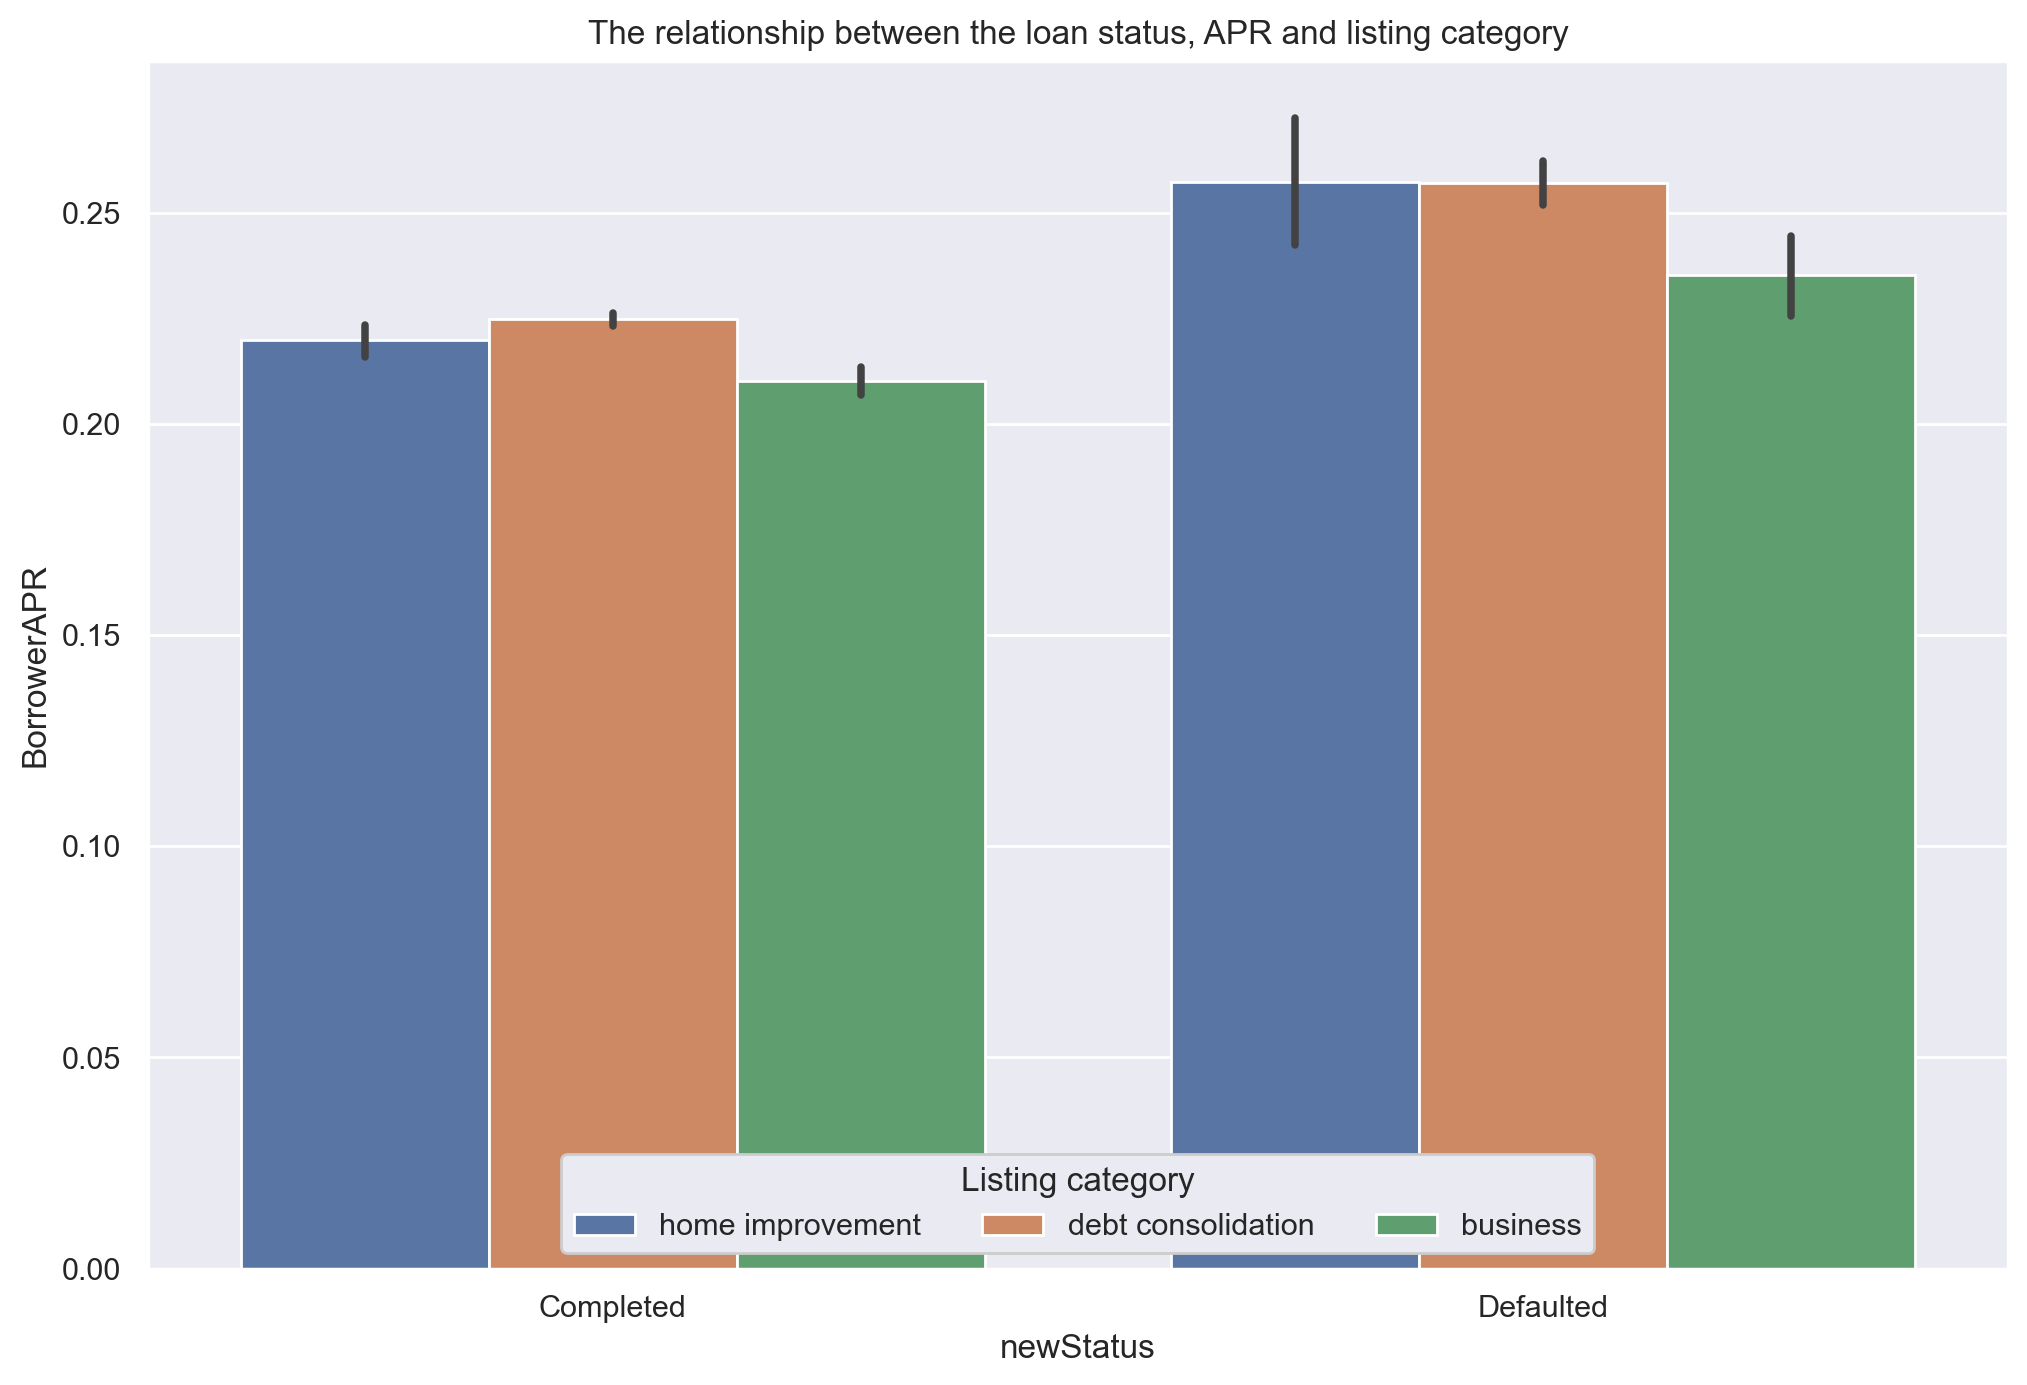

In [41]:
#plotting a clustered bar chart to answer my question
ax = sb.barplot(data = loan_df, y = 'BorrowerAPR', x = 'newStatus', hue = 'topListings')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Listing category')
plt.title('The relationship between the loan status, APR and listing category')
plt.show()

Loans with higher APR had more defaulters, especially those taken out for debt consolidation and home improvement.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Higher loan amounts that had more recommendations were completed. There appears to be a positive relationship between the three variables(loan amount, loan status and recommendation)<br>
Debt consolidation loans with a higher APR had more defaulters.

### Were there any interesting or surprising interactions between features?
I expected unemployed people to default more in loan payments when compared with employed people, but from my analysis, both employed and unemployed people pay off their loans in a similar manner. It's safe to say that there isn't a direct correlation between the employment status and the loan status outcome.


## Conclusions
My main feature of interest was the loan status. From my analysis, I was able to visualize how factors like APR, loan amount, listing category and some other factors influence the outcome of a loan status. The borrower APR of a loan has a relationship with the loan status of that loan in that the higher the APR, the higher the probabilty of the borrower defaulting in the payment of that loan. <br>
Debt consolidation was the most common reason people took out loan, but during the course of my multivariate analysis, I discovered that more people that defaulted in loan payment had taken out such loans for debt consolidation.<br> Part-time employed borrowers tend to take out student loans more than people with other employment statuses.<br>
The number of recommendations a borrower has also seems to have a positive correlation with the loan status, borrowers with more recommendations tend to payoff their loans more than those with fewer recommendations.<br>
Generally, the loans that get cancelled do not exceed \$5000.